# Time Series

## 1. Importing libraries and files

In [51]:
import numpy as np
import pandas as pd

In [52]:

path = './Data_for_Power_BI/weekly_data_for_power_bi.csv'
path_cluster = './df_cluster.csv'
path_events = './Data_for_Power_BI/daily_calendar_with_expanded_events.csv'


In [53]:
#path = '/content/weekly_data_for_power_bi.csv'
#path_cluster = '/content/df_cluster.csv'
#path_events = '/content/daily_calendar_with_expanded_events.csv'

In [54]:
df_weekly = pd.read_csv(path)
df_calendar_original = pd.read_csv(path_events)
df_cluster = pd.read_csv(path_cluster)

In [55]:
df_calendar = df_calendar_original.groupby('yearweek').agg({'date': 'min', 'Weekly_Event' : 'first'}).reset_index()
df_calendar['Year'] = pd.to_datetime(df_calendar['date']).dt.year
df_calendar['Quarter'] = pd.to_datetime(df_calendar['date']).dt.quarter
df_calendar['Month'] = pd.to_datetime(df_calendar['date']).dt.month
df_calendar['Day_month'] = pd.to_datetime(df_calendar['date']).dt.day

In [56]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [57]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1


In [58]:
df_weekly.shape

(6721786, 11)

In [59]:
df_cluster.head()

,sales_ratio_mean,sell_price_mean,sales_ratio_relative_std,release_week,Sociability,Regionality,Seasonality,%trend_slope,price_elasticity,cluster,item
0,2.760999,11.043445,0.290107,131,0.0,0.400899,0.150287,0.0,-0.330625,5,ACCESORIES_1_001
1,1.855793,5.275790,0.582964,6,0.0,0.366412,0.127449,0.0,-0.059177,4,ACCESORIES_1_002
2,1.252894,3.943779,0.565078,161,0.0,0.178200,0.104309,0.0,0.029035,0,ACCESORIES_1_003
3,14.145769,5.981574,0.228632,1,1.0,0.315894,0.030596,0.0,0.308701,4,ACCESORIES_1_004
4,5.570844,3.832410,0.422320,14,0.0,0.212243,0.097256,0.0,-0.369176,1,ACCESORIES_1_005


In [60]:
df_cluster.shape

(3049, 11)

In [61]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [62]:
df_calendar.shape

(279, 7)

In [63]:
df_weekly.week_number.max()

279

In [64]:
df_weekly[df_weekly.week_number > 104].shape

(4886761, 11)

In [65]:
df_weekly[df_weekly.week_number > 278]['yearweek'].unique()

array([201617.])

In [66]:
# Merge calendar features into weekly dataframe
df_weekly = df_weekly.merge(df_calendar[['yearweek', 'Year', 'Quarter', 'Month', 'Day_month']], on='yearweek', how='left')

In [67]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29


## 2. Feature Engineering

In [68]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month'],
      dtype='object')

### Features de precios

In [69]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month'],
      dtype='object')

In [70]:
df_price_mean = df_weekly.groupby(['Year', 'item']).agg({'sell_price': 'mean', 'department' : 'first'}).reset_index()
df_price_mean.rename(columns={'sell_price': 'price_mean_year'}, inplace=True)
df_price_mean.head()

,Year,item,price_mean_year,department
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1


In [71]:
df_price_depart = df_price_mean.groupby(['Year', 'department']).agg({'price_mean_year': 'mean'}).reset_index()
df_price_depart.rename(columns={'price_mean_year': 'price_mean_department_year'}, inplace=True)
df_price_depart.head()

,Year,department,price_mean_department_year
0,2011,ACCESORIES_1,7.001967
1,2011,ACCESORIES_2,3.733769
2,2011,HOME_&_GARDEN_1,6.085186
3,2011,HOME_&_GARDEN_2,7.343540
4,2011,SUPERMARKET_1,4.203097


In [72]:
df_prices_aggregated = df_price_mean.merge(df_price_depart, on=['Year', 'department'], how='left')
df_prices_aggregated.head()

,Year,item,price_mean_year,department,price_mean_department_year
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1,7.001967
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1,7.001967
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1,7.001967
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1,7.001967
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1,7.001967


In [73]:
df_prices_aggregated['price_proportion_item_department'] = df_prices_aggregated['price_mean_year'] / df_prices_aggregated['price_mean_department_year']
df_prices_aggregated.head()

,Year,item,price_mean_year,department,price_mean_department_year,price_proportion_item_department
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1,7.001967,0.754074
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1,7.001967,0.813065
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1,7.001967,0.515653
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1,7.001967,0.091673
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1,7.001967,0.321604


In [74]:
# para agregar los datos de df aggregated al df weekly con un lag de 1 año,
# cambiamos los datos de year por year + 1

df_prices_aggregated['Year_lag1'] = df_prices_aggregated['Year'] + 1

In [75]:
df_weekly_backup1 = df_weekly.copy()

In [76]:
# Añadimos las nuevas features al df_weekly
df_weekly = df_weekly.merge(df_prices_aggregated
                            [['item', 'Year_lag1', 'price_mean_year', 'price_proportion_item_department']],
                            left_on=['item', 'Year'],
                            right_on=['item', 'Year_lag1'],
                            how='left')
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,Year_lag1,price_mean_year,price_proportion_item_department
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29,NaN,NaN,NaN
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29,NaN,NaN,NaN
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29,NaN,NaN,NaN
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29,NaN,NaN,NaN
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29,NaN,NaN,NaN


In [77]:
df_weekly[df_weekly.Year >= 2012].head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,Year_lag1,price_mean_year,price_proportion_item_department
760780,ACCESORIES_1_002,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074
760781,ACCESORIES_1_002,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074
760782,ACCESORIES_1_002,BOS_3,ACCESORIES,ACCESORIES_1,Boston,Back_Bay,201202.0,1,5.28,5.28,51,2012,1,1,7,2012.0,5.28,0.754074
760783,ACCESORIES_1_002,NYC_1,ACCESORIES,ACCESORIES_1,New York,Greenwich_Village,201202.0,1,5.28,5.28,51,2012,1,1,7,2012.0,5.28,0.754074
760784,ACCESORIES_1_002,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074


In [78]:
df_weekly.drop(columns=['Year_lag1'], inplace=True)

In [79]:
df_weekly['changed_price_vs_mean'] = (df_weekly['sell_price'] / df_weekly['price_mean_year']) - 1

In [80]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento
  # semana evento
  # semana post evento
  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media]

### Features de madurez de producto

In [81]:
#Añadimos datos del clustering y de la semana de lanzamiento
df_weekly = df_weekly.merge(df_cluster[['item', 'cluster', 'release_week']], on='item', how='left')

In [82]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,price_mean_year,price_proportion_item_department,changed_price_vs_mean,cluster,release_week
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29,NaN,NaN,NaN,4,1
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29,NaN,NaN,NaN,4,1
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29,NaN,NaN,NaN,4,1
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29,NaN,NaN,NaN,4,1
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29,NaN,NaN,NaN,4,1


In [83]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week'],
      dtype='object')

In [84]:
#permanencia en el mercado
df_weekly['market_presence'] = df_weekly['week_number'] - df_weekly['release_week']

In [85]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence'],
      dtype='object')

### Features de año calendario

In [86]:
## Seno y coseno del año
df_weekly['sin_year'] = np.sin(2 * np.pi * df_weekly['Month'] / 12)
df_weekly['cos_year'] = np.cos(2 * np.pi * df_weekly['Month'] / 12)
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,Month,Day_month,price_mean_year,price_proportion_item_department,changed_price_vs_mean,cluster,release_week,market_presence,sin_year,cos_year
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025


In [87]:
df_weekly[['Month', 'cos_year']].value_counts()

Month  cos_year     
12      1.000000e+00    660088
3       6.123234e-17    640125
4      -5.000000e-01    594577
1       8.660254e-01    573464
8      -5.000000e-01    566746
2       5.000000e-01    559127
11      8.660254e-01    549342
10      5.000000e-01    537768
5      -8.660254e-01    524237
6      -1.000000e+00    515704
9      -1.836970e-16    507913
7      -8.660254e-01    492695
Name: count, dtype: int64

### Features climaticas

In [88]:
!pip install meteostat

In [89]:
from meteostat import Point, Daily
from datetime import datetime, timedelta

In [90]:

# Diccionario con las coordenadas de las estaciones de aeropuerto
cities_config = {
    "Boston": Point(42.3656, -71.0096),       # KBOS
    "Philadelphia": Point(39.8730, -75.2437), # KPHL
    "New York": Point(40.6446, -73.7797)      # KJFK
}

In [91]:
start = datetime(2011, 1, 1)
end = datetime(2016, 12, 31)

In [92]:
def weekyearnum(dt):
    return dt.strftime("%Y%W")

def myweeyearknum(dt):
    offsetdt = dt + timedelta(days=+2) # Adding 2 days offset
    return weekyearnum(offsetdt)

In [93]:
list_of_dfs = []

for city_name, location in cities_config.items():

    data = Daily(location, start, end)
    data = data.fetch()

    data['rainy_day'] = (data['prcp'] > 0).astype(int)

    data['yearweek'] = data.index.to_series().apply(myweeyearknum)

    weekly_weather = data.groupby('yearweek').agg({
    'tavg': 'mean',  # Average Temp
    'tmin': 'min',   # Minimum Temp
    'tmax': 'max',   # Maximum Temp
    'prcp': 'sum',   # Total precipitation volume
    'snow': 'sum',   # Total snowfall
    'wspd': 'mean',  # Average wind speed
    'rainy_day': 'sum'  # Count of rainy days in the week
    })

    weekly_weather.rename(columns={'rainy_day': 'rain_days_count'}, inplace=True)

    weekly_weather['region'] = city_name

    weekly_weather = weekly_weather.reset_index()
    weekly_weather['yearweek'] = weekly_weather['yearweek'].astype(int)

    list_of_dfs.append(weekly_weather)

final_weather_df = pd.concat(list_of_dfs)
final_weather_df.to_csv('./weekly_weather_data_NYC_BOS_PHI.csv', index=False)

In [94]:
final_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 319
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearweek         960 non-null    int64  
 1   tavg             960 non-null    Float64
 2   tmin             960 non-null    Float64
 3   tmax             960 non-null    Float64
 4   prcp             960 non-null    Float64
 5   snow             960 non-null    Float64
 6   wspd             960 non-null    Float64
 7   rain_days_count  960 non-null    int64  
 8   region           960 non-null    object 
dtypes: Float64(6), int64(2), object(1)
memory usage: 80.6+ KB


In [95]:
final_weather_df.head()

,yearweek,tavg,tmin,tmax,prcp,snow,wspd,rain_days_count,region
0,201101,1.514286,-5.6,13.3,4.3,66.0,15.171429,2,Boston
1,201102,-2.357143,-7.8,1.7,43.0,157.0,23.142857,3,Boston
2,201103,-2.5,-10.0,4.4,47.4,265.0,16.928571,3,Boston
3,201104,-6.071429,-18.9,1.7,21.4,379.0,15.471429,3,Boston
4,201105,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2,Boston


In [96]:
final_weather_df.shape

(960, 9)

In [97]:
final_weather_df.isnull().sum()

yearweek           0
tavg               0
tmin               0
tmax               0
prcp               0
snow               0
wspd               0
rain_days_count    0
region             0
dtype: int64

In [98]:
df_weekly_backup2 = df_weekly.copy()

In [99]:
df_weekly.merge(final_weather_df, on=['yearweek', 'region'], how='left')

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,market_presence,sin_year,cos_year,tavg,tmin,tmax,prcp,snow,wspd,rain_days_count
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,0,0.500000,0.866025,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,0,0.500000,0.866025,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,0,0.500000,0.866025,-1.2,-6.7,3.9,19.6,147.0,17.214286,3
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,0,0.500000,0.866025,-1.2,-6.7,3.9,19.6,147.0,17.214286,3
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,0,0.500000,0.866025,-0.728571,-7.8,5.6,18.4,121.0,13.314286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721781,SUPERMARKET_3_827,NYC_3,SUPERMARKET,SUPERMARKET_3,New York,Tribeca,201617.0,16,1.20,19.20,...,114,0.866025,-0.500000,12.657143,7.8,21.7,4.8,0.0,15.885714,3
6721782,SUPERMARKET_3_827,NYC_4,SUPERMARKET,SUPERMARKET_3,New York,Brooklyn,201617.0,12,1.20,14.40,...,114,0.866025,-0.500000,12.657143,7.8,21.7,4.8,0.0,15.885714,3
6721783,SUPERMARKET_3_827,PHI_1,SUPERMARKET,SUPERMARKET_3,Philadelphia,Midtown_Village,201617.0,0,1.20,0.00,...,114,0.866025,-0.500000,14.4,7.2,30.0,9.9,0.0,14.4,3
6721784,SUPERMARKET_3_827,PHI_2,SUPERMARKET,SUPERMARKET_3,Philadelphia,Yorktown,201617.0,2,1.20,2.40,...,114,0.866025,-0.500000,14.4,7.2,30.0,9.9,0.0,14.4,3


In [100]:
df_weekly = df_weekly.merge(final_weather_df, on=['yearweek', 'region'], how='left')

In [101]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count'],
      dtype='object')

In [102]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento
  # semana evento
  # semana post evento
  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de eventos

In [103]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [104]:
## Como ya tenemos los datos climáticos (nieve, viento, etc), añadir el
# evento de "blizzard" y "hurricane" en la semana correspondiente sería redundante

clima_redundante = ["Blizzard", "Hurricane"]

def limpiar_eventos_climaticos(texto_evento):
    for termino in clima_redundante:
        if termino in texto_evento:
            return "No Event"

    return texto_evento

# Aplicamos la limpieza al calendario
df_calendar['Weekly_Event_Clean'] = df_calendar['Weekly_Event'].apply(limpiar_eventos_climaticos)

In [105]:
def crear_variable_anticipacion(df, event_column, string_event, max_weeks=8):
    """
    Creates a 'heat' feature (0 to max_weeks) indicating proximity to an event.
    df: DataFrame of the calendar (ordered)
    event_column: Name of the column with event texts (e.g., 'Weekly_Event_Clean')
    string_event: Text to search for (e.g., "Valentine's")
    max_weeks: How many weeks before to start counting (e.g., 4 or 8)
    """

    # identification of event occurrences (Boolean)
    is_event = df[event_column].str.contains(string_event, na=False, regex=False)

    # index series where event occurs
    event_indices = pd.Series(np.where(is_event, df.index, np.nan), index=df.index)

    # fill NaNs backwards with next valid event index
    next_event_index = event_indices.bfill()

    # Transform distance into "heat" (invert)
    distance = next_event_index - df.index
    heat_feature = distance.apply(lambda x: max(0, max_weeks - x) if not np.isnan(x) else 0)

    return heat_feature

In [106]:
df_calendar = df_calendar.sort_values('yearweek').reset_index(drop=True)

df_calendar['valentines_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Valentine's Day", max_weeks=4)
df_calendar['xmas_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Christmas", max_weeks=8)
df_calendar['superbowl_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Superbowl", max_weeks=3)
df_calendar['thanksgiving_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Thanksgiving", max_weeks=3)
df_calendar['july4_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Independence Day", max_weeks=3)

# Verificación visual
print(df_calendar[['yearweek', 'Weekly_Event_Clean', 'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat', 'july4_heat']].head(20))

    yearweek            Weekly_Event_Clean  valentines_heat  xmas_heat  \
0   201105.0                      No Event              2.0        0.0   
1   201106.0                     Superbowl              3.0        0.0   
2   201107.0               Valentine's Day              4.0        0.0   
3   201108.0               Presidents' Day              0.0        0.0   
4   201109.0                      No Event              0.0        0.0   
5   201110.0                      No Event              0.0        0.0   
6   201111.0                      No Event              0.0        0.0   
7   201112.0                      No Event              0.0        0.0   
8   201113.0                      No Event              0.0        0.0   
9   201114.0                      No Event              0.0        0.0   
10  201115.0                      No Event              0.0        0.0   
11  201116.0        Patriots' Day (Boston)              0.0        0.0   
12  201117.0                 Easter Su

In [107]:
shopping_keys = ["Black Friday", "Cyber Monday", "Christmas", "Valentine's Day"]
closed_keys = ["New Year's Day", "Thanksgiving", "Christmas", "Independence Day"]

In [108]:
def classify_event(event_string, keys):
    """Returns 1 if any key is found in the event string description."""
    if event_string == "No Event":
        return 0
    # Check if any key substring is present in the weekly event string
    for key in keys:
        if key in event_string:
            return 1
    return 0

In [109]:
df_calendar['is_shopping_event'] = df_calendar['Weekly_Event_Clean'].apply(lambda x: classify_event(x, shopping_keys))
df_calendar['is_holiday_closed'] = df_calendar['Weekly_Event_Clean'].apply(lambda x: classify_event(x, closed_keys))

In [110]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month,Weekly_Event_Clean,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
0,201105.0,2011-01-29,No Event,2011,1,1,29,No Event,2.0,0.0,2.0,0.0,0.0,0,0
1,201106.0,2011-02-05,Superbowl,2011,1,2,5,Superbowl,3.0,0.0,3.0,0.0,0.0,0,0
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12,Valentine's Day,4.0,0.0,0.0,0.0,0.0,1,0
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19,Presidents' Day,0.0,0.0,0.0,0.0,0.0,0,0
4,201109.0,2011-02-26,No Event,2011,1,2,26,No Event,0.0,0.0,0.0,0.0,0.0,0,0


In [111]:
df_weekly_backup3 = df_weekly.copy()

In [112]:
### Hacemos merge del calendario con las nuevas features al df_weekly
df_weekly = df_weekly.merge(df_calendar[['yearweek', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
                                        'thanksgiving_heat', 'july4_heat', 'is_shopping_event', 'is_holiday_closed']],
                            on='yearweek', how='left')

In [113]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,snow,wspd,rain_days_count,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,470.0,14.771429,2,2.0,0.0,2.0,0.0,0.0,0,0
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,470.0,14.771429,2,2.0,0.0,2.0,0.0,0.0,0,0
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,147.0,17.214286,3,2.0,0.0,2.0,0.0,0.0,0,0
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,147.0,17.214286,3,2.0,0.0,2.0,0.0,0.0,0,0
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,121.0,13.314286,3,2.0,0.0,2.0,0.0,0.0,0,0


In [114]:
df_weekly[df_weekly['xmas_heat'] == 8]

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,snow,wspd,rain_days_count,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
710630,ACCESORIES_1_002,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201152.0,0,5.28,0.00,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710631,ACCESORIES_1_002,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201152.0,2,5.28,10.56,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710632,ACCESORIES_1_002,BOS_3,ACCESORIES,ACCESORIES_1,Boston,Back_Bay,201152.0,1,5.28,5.28,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710633,ACCESORIES_1_002,NYC_1,ACCESORIES,ACCESORIES_1,New York,Greenwich_Village,201152.0,2,5.28,10.56,...,0.0,22.433333,1,0.0,8.0,0.0,0.0,0.0,1,1
710634,ACCESORIES_1_002,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201152.0,4,5.28,21.12,...,0.0,22.433333,1,0.0,8.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142574,SUPERMARKET_3_827,NYC_3,SUPERMARKET,SUPERMARKET_3,New York,Tribeca,201551.0,22,1.20,26.40,...,0.0,17.228571,4,0.0,8.0,0.0,0.0,0.0,1,1
6142575,SUPERMARKET_3_827,NYC_4,SUPERMARKET,SUPERMARKET_3,New York,Brooklyn,201551.0,0,1.20,0.00,...,0.0,17.228571,4,0.0,8.0,0.0,0.0,0.0,1,1
6142576,SUPERMARKET_3_827,PHI_1,SUPERMARKET,SUPERMARKET_3,Philadelphia,Midtown_Village,201551.0,11,1.20,13.20,...,0.0,15.471429,4,0.0,8.0,0.0,0.0,0.0,1,1
6142577,SUPERMARKET_3_827,PHI_2,SUPERMARKET,SUPERMARKET_3,Philadelphia,Yorktown,201551.0,11,1.20,13.20,...,0.0,15.471429,4,0.0,8.0,0.0,0.0,0.0,1,1


In [115]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count',
       'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat',
       'july4_heat', 'is_shopping_event', 'is_holiday_closed'],
      dtype='object')

In [116]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento individual                  OK
  # semana evento individual                           OK

  # semana previa a evento evento
  # semana evento                                      OK
  # semana post evento





  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de lag y rolling mean

In [117]:

# Lags (Past values)
df_weekly.sort_values(by=[ 'item', 'store_code', 'yearweek'], inplace=True)
# Previous week sales (t-1)
df_weekly['lag_1_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(1)

# Sales 4 weeks ago (approx 1 month)
df_weekly['lag_4_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(4)

# Sales 26 weeks ago (approx 6 months)
df_weekly['lag_26_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(26)

# Sales 52 weeks ago (approx 1 year)
df_weekly['lag_52_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(52)



In [118]:
df_weekly[df_weekly.item == 'ACCESORIES_1_004'][['item', 'sale', 'lag_1_sale', 'lag_4_sale', 'lag_52_sale']].head()

,item,sale,lag_1_sale,lag_4_sale,lag_52_sale
0,ACCESORIES_1_004,10,NaN,NaN,NaN
10932,ACCESORIES_1_004,10,10.0,NaN,NaN
22907,ACCESORIES_1_004,7,10.0,NaN,NaN
35426,ACCESORIES_1_004,11,7.0,NaN,NaN
48225,ACCESORIES_1_004,12,11.0,10.0,NaN


In [119]:
df_weekly = df_weekly.sort_values(by=['item', 'store_code', 'week_number'])
g = df_weekly.groupby(['item', 'store_code'])['sale']

# Aplicamos el rolling sobre esa columna desplazada.
df_weekly['shifted_sale'] = g.shift(1)

# Calculamos el rolling sobre el grupo usando la columna ya desplazada
df_weekly['rolling_mean_4w_sale'] = df_weekly.groupby(['item', 'store_code'])['shifted_sale'] \
                                              .transform(lambda x: x.rolling(window=4, min_periods=1).mean())

In [ ]:
df_weekly['shifted_sale']

2444042     NaN
2468673     4.0
2493413     3.0
2518262     3.0
2543156     1.0
           ... 
6599825    17.0
6630315    23.0
6660805    11.0
6691295     1.0
6721785     0.0
Name: shifted_sale, Length: 6721786, dtype: float64

In [122]:
df_weekly.drop(columns=['shifted_sale'], inplace=True)

In [123]:
df_weekly[(df_weekly.item == 'ACCESORIES_1_001') & (df_weekly.store_code == 'NYC_2')][['item', 'sale', 'store_code', 'yearweek', 'rolling_mean_4w_sale']].head(50)

,item,sale,store_code,yearweek,rolling_mean_4w_sale
2493417,ACCESORIES_1_001,2,NYC_2,201330.0,NaN
2518266,ACCESORIES_1_001,1,NYC_2,201331.0,2.000000
2543160,ACCESORIES_1_001,5,NYC_2,201332.0,1.500000
2568084,ACCESORIES_1_001,3,NYC_2,201333.0,2.666667
2593099,ACCESORIES_1_001,3,NYC_2,201334.0,2.750000
2618171,ACCESORIES_1_001,8,NYC_2,201335.0,3.000000
2643320,ACCESORIES_1_001,0,NYC_2,201336.0,4.750000
2668543,ACCESORIES_1_001,4,NYC_2,201337.0,3.500000
2693863,ACCESORIES_1_001,4,NYC_2,201338.0,3.750000
2719260,ACCESORIES_1_001,4,NYC_2,201339.0,4.000000


In [124]:
df_weekly.item.head()

2444042    ACCESORIES_1_001
2468673    ACCESORIES_1_001
2493413    ACCESORIES_1_001
2518262    ACCESORIES_1_001
2543156    ACCESORIES_1_001
Name: item, dtype: object

In [ ]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)                    OK

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento                          OK
  # semana evento                                   OK
  # semana post evento                              OK



  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de Regionality

In [125]:
column_segmentation = 'region'

In [126]:
df_weekly_sales_region_year =  df_weekly.groupby(['item','Year', column_segmentation])['sale'].sum().reset_index()

In [127]:
df_weekly_sales_year =  df_weekly.groupby(['item','Year'])['sale'].sum().reset_index().rename(columns={'sale':'sale_year'})

In [128]:
df_weekly_sales_region_year = df_weekly_sales_region_year.merge(df_weekly_sales_year, on=['item', 'Year'], how='left')

In [129]:
df_weekly_sales_region_year.head()

,item,Year,region,sale,sale_year
0,ACCESORIES_1_001,2013,Boston,146,598
1,ACCESORIES_1_001,2013,New York,406,598
2,ACCESORIES_1_001,2013,Philadelphia,46,598
3,ACCESORIES_1_001,2014,Boston,316,1282
4,ACCESORIES_1_001,2014,New York,817,1282


In [130]:
df_weekly_sales_region_year['sale_region_proportion'] = df_weekly_sales_region_year['sale'] / df_weekly_sales_region_year['sale_year']

In [131]:
lag_year = 1
df_weekly_sales_region_year[f'Year_lag_{lag_year}'] = df_weekly_sales_region_year['Year'] + lag_year

In [132]:
df_weekly_sales_region_year.head()

,item,Year,region,sale,sale_year,sale_region_proportion,Year_lag_1
0,ACCESORIES_1_001,2013,Boston,146,598,0.244147,2014
1,ACCESORIES_1_001,2013,New York,406,598,0.678930,2014
2,ACCESORIES_1_001,2013,Philadelphia,46,598,0.076923,2014
3,ACCESORIES_1_001,2014,Boston,316,1282,0.246490,2015
4,ACCESORIES_1_001,2014,New York,817,1282,0.637285,2015


In [133]:
# merge weekly: anexamos a item, region, year con item, region, year_lag_1
df_weekly = df_weekly.merge(df_weekly_sales_region_year[['item', 'region', 'Year_lag_1', 'sale_region_proportion']],
                            left_on=['item', 'region', 'Year'], right_on=['item', 'region', 'Year_lag_1'],
                            how='left')

In [134]:
df_weekly.drop(columns=['Year_lag_1'], inplace=True)

In [ ]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)                    OK

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)                       OK

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento                          OK
  # semana evento                                   OK
  # semana post evento                              OK



  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de Sesionality

In [135]:
column_segmentation = 'Quarter'

In [136]:
df_weekly_sales_quarter_year =  df_weekly.groupby(['item','Year', column_segmentation])['sale'].sum().reset_index()

In [137]:
df_weekly_sales_year =  df_weekly.groupby(['item','Year'])['sale'].sum().reset_index().rename(columns={'sale':'sale_year'})

In [138]:
df_weekly_sales_quarter_year = df_weekly_sales_quarter_year.merge(df_weekly_sales_year, on=['item', 'Year'], how='left')

In [139]:
df_weekly_sales_quarter_year.head()

,item,Year,Quarter,sale,sale_year
0,ACCESORIES_1_001,2013,3,224,598
1,ACCESORIES_1_001,2013,4,374,598
2,ACCESORIES_1_001,2014,1,327,1282
3,ACCESORIES_1_001,2014,2,303,1282
4,ACCESORIES_1_001,2014,3,302,1282


In [140]:
# calculamos la proporción de ventas del trimestre sobre las ventas del año
df_weekly_sales_quarter_year['sale_quarter_proportion'] = df_weekly_sales_quarter_year['sale'] / df_weekly_sales_quarter_year['sale_year']

In [141]:
lag_year = 1
df_weekly_sales_quarter_year[f'Year_lag_{lag_year}'] = df_weekly_sales_quarter_year['Year'] + lag_year

In [142]:
df_weekly_sales_quarter_year.head()

,item,Year,Quarter,sale,sale_year,sale_quarter_proportion,Year_lag_1
0,ACCESORIES_1_001,2013,3,224,598,0.374582,2014
1,ACCESORIES_1_001,2013,4,374,598,0.625418,2014
2,ACCESORIES_1_001,2014,1,327,1282,0.255070,2015
3,ACCESORIES_1_001,2014,2,303,1282,0.236349,2015
4,ACCESORIES_1_001,2014,3,302,1282,0.235569,2015


In [143]:
df_weekly = df_weekly.merge(df_weekly_sales_quarter_year[['item', column_segmentation, 'Year_lag_1', 'sale_quarter_proportion']],
                            left_on=['item', column_segmentation, 'Year'], right_on=['item', column_segmentation, 'Year_lag_1'],
                            how='left')

In [144]:
df_weekly.drop(columns=['Year_lag_1'], inplace=True)

### Procesamiento de target no estacionario

In [ ]:
"""
preprocesamiento del target (dif, log)

# Variation / Detrending (Target for stationary models)
# "Diff": Absolute difference (Current - Previous)
df_weekly['sales_diff'] = df_weekly.groupby(['item', 'store_code'])['sale'].diff(1)
df_weekly['price_diff'] = df_weekly.groupby(['item', 'store_code'])['sell_price'].diff(1)

# "Log": Natural logarithm
df_weekly['sales_log'] = np.log(df_weekly['sale'])

"""

'\npreprocesamiento del target (dif, log)\n\n# Variation / Detrending (Target for stationary models)\n# "Diff": Absolute difference (Current - Previous)\ndf_weekly[\'sales_diff\'] = df_weekly.groupby([\'item\', \'store_code\'])[\'sale\'].diff(1)\ndf_weekly[\'price_diff\'] = df_weekly.groupby([\'item\', \'store_code\'])[\'sell_price\'].diff(1)\n\n# "Log": Natural logarithm\ndf_weekly[\'sales_log\'] = np.log(df_weekly[\'sale\'])\n\n'

## 3. Encoding de columnas

In [145]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count',
       'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat',
       'july4_heat', 'is_shopping_event', 'is_holiday_closed', 'lag_1_sale',
       'lag_4_sale', 'lag_26_sale', 'lag_52_sale', 'rolling_mean_4w_sale',
       'sale_region_proportion', 'sale_quarter_proportion'],
      dtype='object')

In [146]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721786 entries, 0 to 6721785
Data columns (total 44 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   item                              object 
 1   store_code                        object 
 2   category_x                        object 
 3   department                        object 
 4   region                            object 
 5   store                             object 
 6   yearweek                          float64
 7   sale                              int64  
 8   sell_price                        float64
 9   daily_revenue                     float64
 10  week_number                       int64  
 11  Year                              int32  
 12  Quarter                           int32  
 13  Month                             int32  
 14  Day_month                         int32  
 15  price_mean_year                   float64
 16  price_proportion_item_department  fl

In [147]:
df_weekly.isnull().sum()

item                                      0
store_code                                0
category_x                                0
department                                0
region                                    0
store                                     0
yearweek                                  0
sale                                      0
sell_price                                0
daily_revenue                             0
week_number                               0
Year                                      0
Quarter                                   0
Month                                     0
Day_month                                 0
price_mean_year                     1102724
price_proportion_item_department    1102724
changed_price_vs_mean               1102724
cluster                                   0
release_week                              0
market_presence                           0
sin_year                                  0
cos_year                        

In [148]:
df_weekly.shape

(6721786, 44)

### Tratamiento de Nulls

In [149]:
df_weekly_backup4 = df_weekly.copy()

In [152]:
columns_with_nulls = ['price_mean_year', 'price_proportion_item_department', 'changed_price_vs_mean', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale', 'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion', 'sale_quarter_proportion']

In [153]:
#completamos columnas con valor -1000
null_value = -1000
for column in columns_with_nulls:
  df_weekly[column].fillna(null_value, inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [154]:
df_weekly.isnull().sum()

item                                0
store_code                          0
category_x                          0
department                          0
region                              0
store                               0
yearweek                            0
sale                                0
sell_price                          0
daily_revenue                       0
week_number                         0
Year                                0
Quarter                             0
Month                               0
Day_month                           0
price_mean_year                     0
price_proportion_item_department    0
changed_price_vs_mean               0
cluster                             0
release_week                        0
market_presence                     0
sin_year                            0
cos_year                            0
tavg                                0
tmin                                0
tmax                                0
prcp        

### Tratamiento de Objects

In [155]:
df_weekly_backup5 = df_weekly.copy()

In [156]:
columns_object = ['item', 'store_code','category_x', 'department', 'region', 'store']

In [157]:
for column in columns_object:
  print(column)
  print(df_weekly[column].unique())

item
['ACCESORIES_1_001' 'ACCESORIES_1_002' 'ACCESORIES_1_003' ...
 'SUPERMARKET_3_825' 'SUPERMARKET_3_826' 'SUPERMARKET_3_827']
store_code
['BOS_1' 'BOS_2' 'BOS_3' 'NYC_1' 'NYC_2' 'NYC_3' 'NYC_4' 'PHI_1' 'PHI_2'
 'PHI_3']
category_x
['ACCESORIES' 'HOME_&_GARDEN' 'SUPERMARKET']
department
['ACCESORIES_1' 'ACCESORIES_2' 'HOME_&_GARDEN_1' 'HOME_&_GARDEN_2'
 'SUPERMARKET_1' 'SUPERMARKET_2' 'SUPERMARKET_3']
region
['Boston' 'New York' 'Philadelphia']
store
['South_End' 'Roxbury' 'Back_Bay' 'Greenwich_Village' 'Harlem' 'Tribeca'
 'Brooklyn' 'Midtown_Village' 'Yorktown' 'Queen_Village']


In [158]:
df_weekly.groupby('department')['item'].nunique()

department
ACCESORIES_1       416
ACCESORIES_2       149
HOME_&_GARDEN_1    532
HOME_&_GARDEN_2    515
SUPERMARKET_1      216
SUPERMARKET_2      398
SUPERMARKET_3      823
Name: item, dtype: int64

In [159]:
df_weekly.groupby('store')['region'].first()

store
Back_Bay                   Boston
Brooklyn                 New York
Greenwich_Village        New York
Harlem                   New York
Midtown_Village      Philadelphia
Queen_Village        Philadelphia
Roxbury                    Boston
South_End                  Boston
Tribeca                  New York
Yorktown             Philadelphia
Name: region, dtype: object

In [160]:
# removemos item (dejamos como index ¿?)
# OHE de store, eliminamos region por redundancia
# OHE de department, eliminamos category por redundancia

In [161]:
df_weekly['unique_id'] = df_weekly['item'] + '_' + df_weekly['store_code']

In [162]:
df_weekly.drop(columns=['item'], inplace=True)

In [163]:
columns_object_to_drop = ['category_x','region', 'store', 'yearweek', 'daily_revenue']
df_weekly.drop(columns=columns_object_to_drop, inplace=True)

In [164]:
columns_object_to_ohe = ['store_code', 'department']

In [165]:
#aplicamos ohe get dummies
df_weekly = pd.get_dummies(df_weekly, columns=columns_object_to_ohe, drop_first=True)

In [166]:
df_weekly.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [167]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721786 entries, 0 to 6721785
Data columns (total 52 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   sale                              int64  
 1   sell_price                        float64
 2   week_number                       int64  
 3   Year                              int32  
 4   Quarter                           int32  
 5   Month                             int32  
 6   Day_month                         int32  
 7   price_mean_year                   float64
 8   price_proportion_item_department  float64
 9   changed_price_vs_mean             float64
 10  cluster                           int64  
 11  release_week                      int64  
 12  market_presence                   int64  
 13  sin_year                          float64
 14  cos_year                          float64
 15  tavg                              Float64
 16  tmin                              Fl

In [168]:
df_weekly.shape

(6721786, 52)

## 4. Particion

In [4]:
#Eliminaremos el primer año completo (52 semanas) para evitar problemas con los lags
week_number_delete = 52

In [5]:
df_weekly = df_weekly[df_weekly.week_number > week_number_delete]

In [8]:
df_weekly.shape

(5927218, 52)

In [ ]:
#df_weekly.to_csv('./df_weekly_final_features_engineered.csv', index=False)

## Modelo

In [ ]:
#import pandas as pd
#import numpy as np
#df_weekly = pd.read_csv('./df_weekly_final_features_engineered.csv')

In [9]:
max_week = df_weekly.week_number.max()
min_week = df_weekly.week_number.min()

week_number_val = 255
week_number_test = 270
max_week_test = 279

In [10]:
def get_data_splits(df, split_dates):
    X_ = (
        df[df["week_number"].isin(split_dates)]
        .drop(
            ["sale", "week_number"]
        , axis = 1
        ).set_index("unique_id")
    )
    y_ = df[df["week_number"].isin(split_dates)].set_index("unique_id")["sale"]
    
    print(split_dates)
    print(X_.shape, y_.shape)
    
    return X_, y_

In [11]:
train_dates = range(min_week, week_number_val - 1)
val_dates = range(week_number_val, week_number_test - 1)
test_dates = range(week_number_test, max_week_test)

In [17]:
x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)
range(270, 279)
(274410, 49) (274410,)


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=30,
    max_depth=13,
    random_state=42
)

In [ ]:
model.fit(
    X = x_train,
    y = y_train,
    eval_set = [(x_train, y_train), (x_val, y_val)]
)

[0]	validation_0-rmse:19.29354	validation_1-rmse:15.03454
[1]	validation_0-rmse:14.93835	validation_1-rmse:12.21743
[2]	validation_0-rmse:12.11686	validation_1-rmse:10.41054
[3]	validation_0-rmse:10.29797	validation_1-rmse:9.44465
[4]	validation_0-rmse:9.16045	validation_1-rmse:8.89000
[5]	validation_0-rmse:8.44701	validation_1-rmse:8.59365
[6]	validation_0-rmse:7.98093	validation_1-rmse:8.43811
[7]	validation_0-rmse:7.67573	validation_1-rmse:8.36155
[8]	validation_0-rmse:7.45171	validation_1-rmse:8.32875
[9]	validation_0-rmse:7.26265	validation_1-rmse:8.31132
[10]	validation_0-rmse:7.11386	validation_1-rmse:8.28638
[11]	validation_0-rmse:6.99728	validation_1-rmse:8.27965
[12]	validation_0-rmse:6.89631	validation_1-rmse:8.27508
[13]	validation_0-rmse:6.77847	validation_1-rmse:8.28060
[14]	validation_0-rmse:6.69777	validation_1-rmse:8.28365
[15]	validation_0-rmse:6.61717	validation_1-rmse:8.28612
[16]	validation_0-rmse:6.55167	validation_1-rmse:8.27603
[17]	validation_0-rmse:6.49717	val

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from sklearn.metrics import root_mean_squared_error
y_train_pred = model.predict(x_train)
rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
rmse_train

5.891999244689941

In [ ]:
y_val_pred = model.predict(x_val)
rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
rmse_test

8.349903106689453

In [ ]:
y_test_pred = model.predict(x_test)
rmse_test = root_mean_squared_error(y_true = y_test, y_pred=y_test_pred)
rmse_test

8.270241737365723

In [ ]:
import matplotlib.pyplot as plt

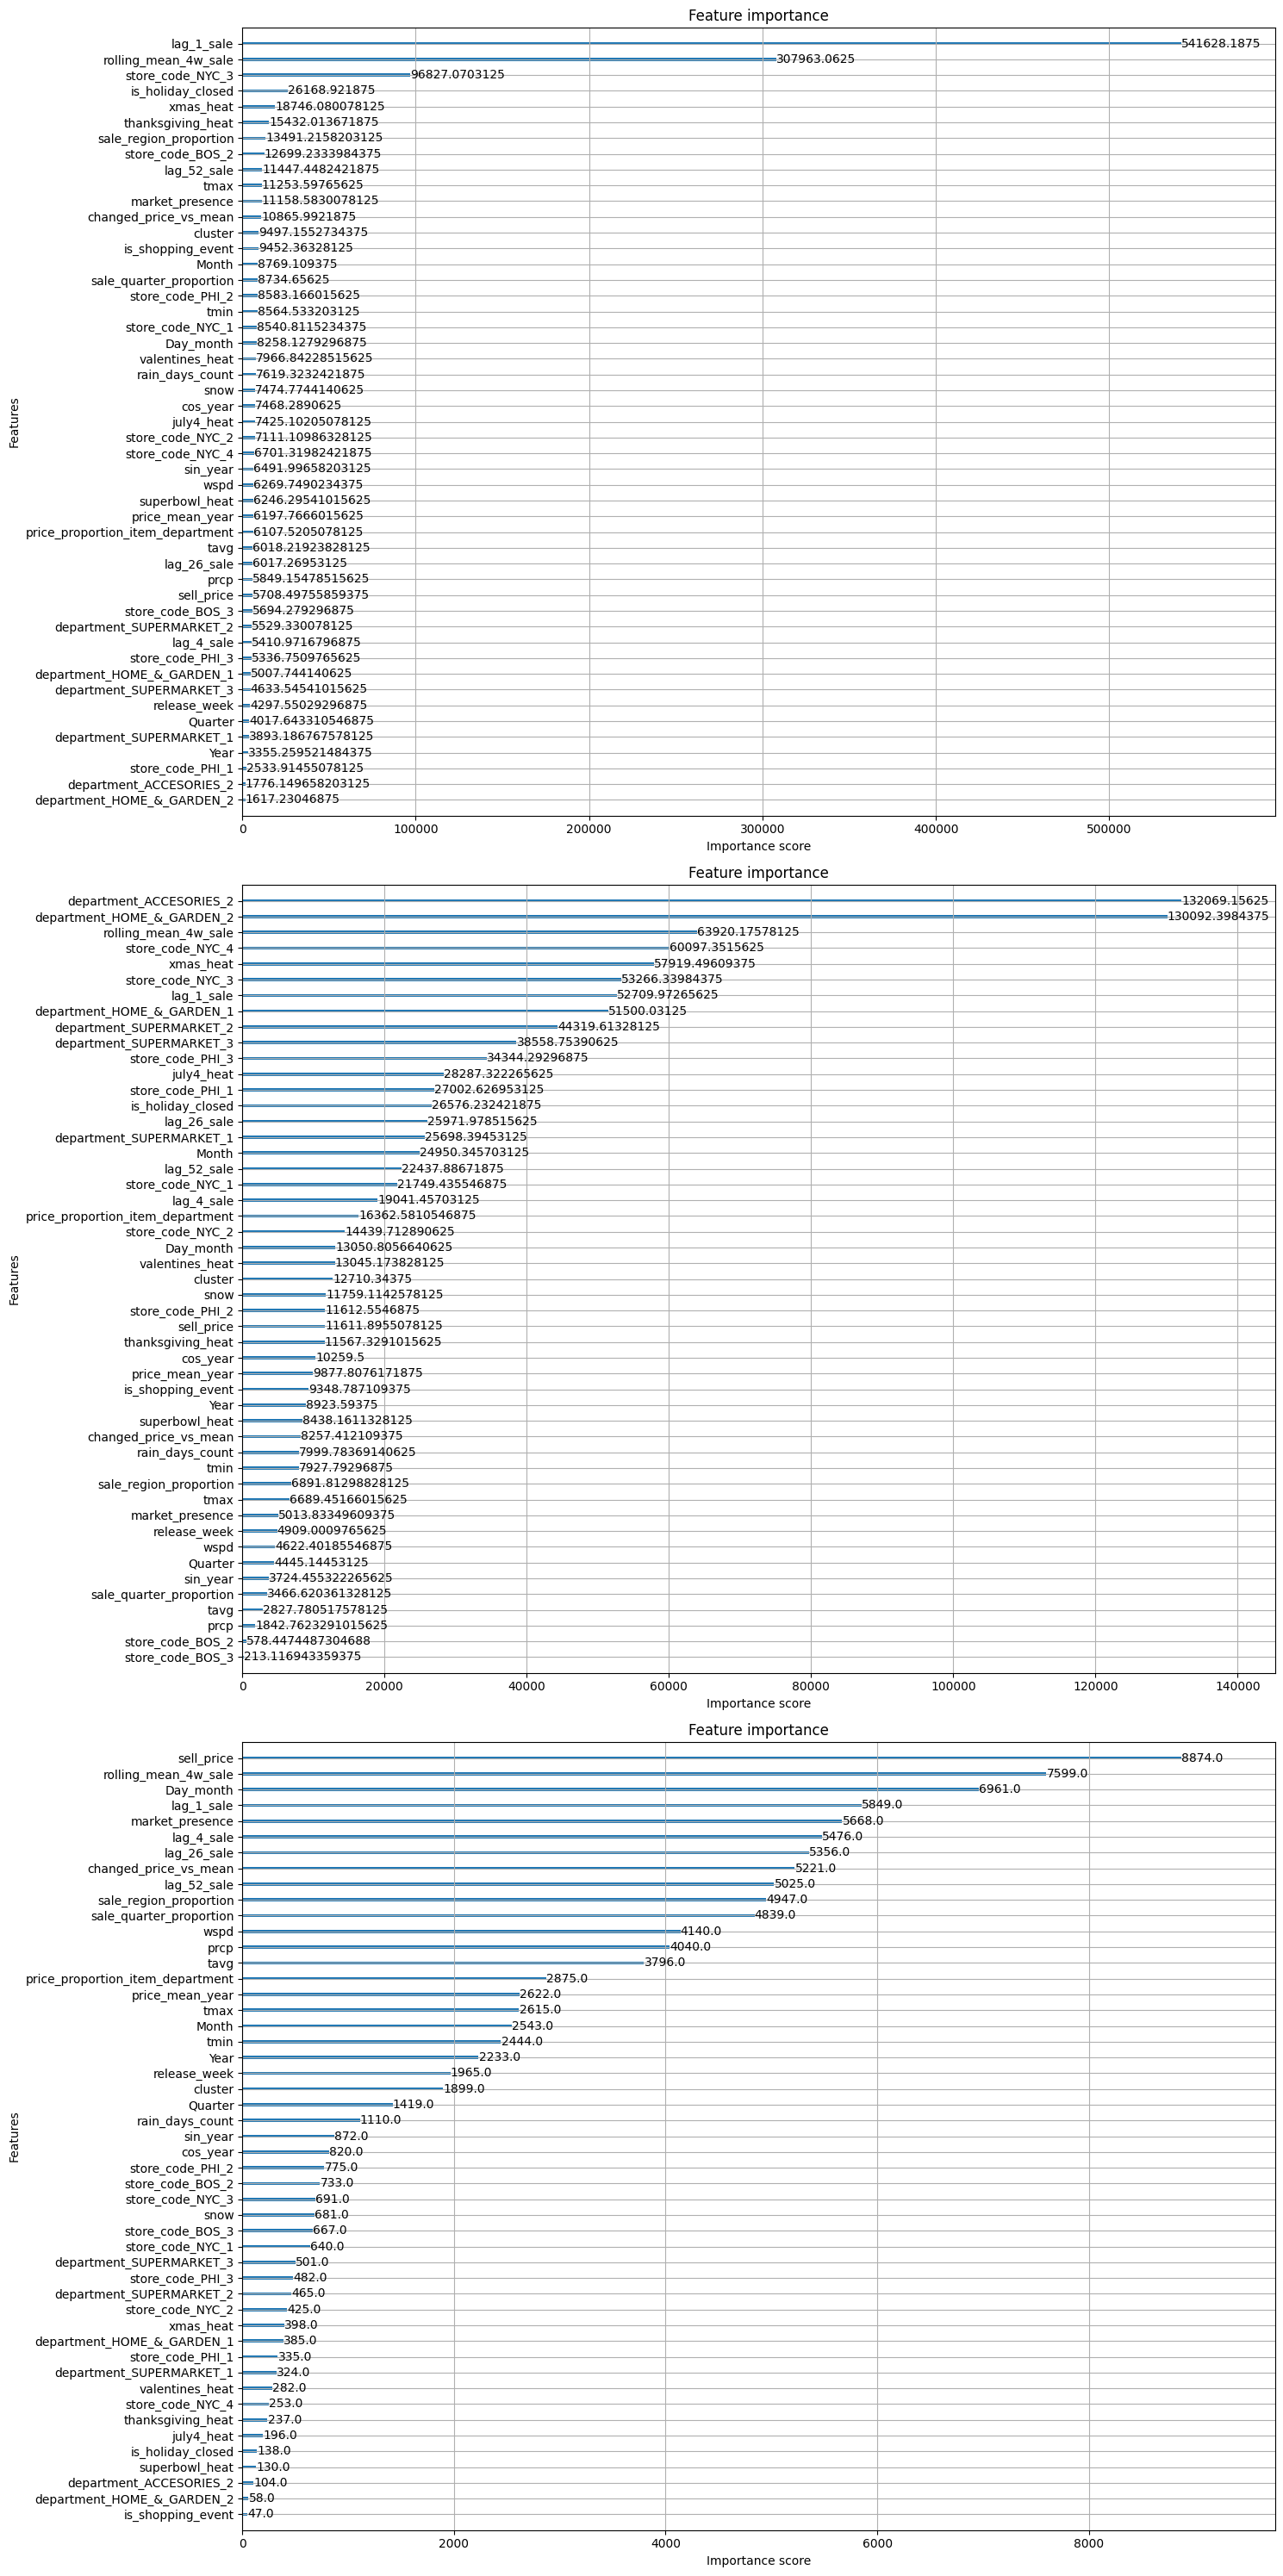

In [ ]:
fig = plt.figure(figsize=(15, 30))
ax1, ax2, ax3 = fig.subplots(3, 1)
xgb.plot_importance(booster = model, ax = ax1, importance_type = "gain")
xgb.plot_importance(booster = model, ax = ax2, importance_type = "cover")
xgb.plot_importance(booster = model, ax = ax3, importance_type = "weight")
plt.tight_layout();

# REFACTORIZAMOS BUSQUEDA DE FEATURES

In [ ]:
results = {}

In [ ]:
df_weekly.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [ ]:
df_weekly.shape

(5927218, 52)

In [ ]:
columnas = df_weekly.columns
meta_data = ['unique_id', 'week_number', 'sale']
list_features = list(set(columnas) - set(meta_data))
print(list_features)

['lag_26_sale', 'sell_price', 'department_ACCESORIES_2', 'july4_heat', 'valentines_heat', 'tmax', 'tavg', 'department_SUPERMARKET_1', 'store_code_PHI_1', 'department_HOME_&_GARDEN_2', 'store_code_NYC_3', 'lag_4_sale', 'market_presence', 'store_code_NYC_1', 'tmin', 'changed_price_vs_mean', 'sale_region_proportion', 'prcp', 'superbowl_heat', 'lag_1_sale', 'thanksgiving_heat', 'xmas_heat', 'price_proportion_item_department', 'cluster', 'cos_year', 'store_code_BOS_2', 'store_code_NYC_2', 'store_code_PHI_3', 'sale_quarter_proportion', 'lag_52_sale', 'department_SUPERMARKET_3', 'department_SUPERMARKET_2', 'wspd', 'Month', 'store_code_PHI_2', 'sin_year', 'is_holiday_closed', 'rolling_mean_4w_sale', 'Year', 'price_mean_year', 'Quarter', 'store_code_BOS_3', 'snow', 'release_week', 'rain_days_count', 'department_HOME_&_GARDEN_1', 'store_code_NYC_4', 'Day_month', 'is_shopping_event']


In [ ]:
def select_features(list_features):
  import random
  #seleccionamos una cantidad random de features
  k = random.randint(10, 20)
  features_selected = random.sample(list_features, k)
  return features_selected

In [37]:
x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)
range(270, 279)
(274410, 49) (274410,)


In [ ]:
# Bucle de entrenamiento con selección aleatoria de features
for i in range(1, 100):
  print(i)
  features_selected = select_features(list_features)
  x_train_i = x_train[features_selected]
  x_val_i = x_val[features_selected]
  model = xgb.XGBRegressor( random_state = 42,
    objective='reg:squarederror',
    n_estimators=15,
    max_depth=10
  )
  model.fit(
    X = x_train_i,
    y = y_train
    #eval_set = [(X_train, y_train), (X_test, y_test)],
    #early_stopping_rounds = 20
  )
  y_train_pred = model.predict(x_train_i)
  rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
  y_val_pred = model.predict(x_val_i)
  rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
  results[i] = [list(set(features_selected) - set(meta_data)), rmse_train, rmse_test]
  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['features', 'rmse_train', 'rmse_test'])
df_results.sort_values(by='rmse_test', inplace=True)
df_results['rmse_test'].min()

8.200313568115234

In [ ]:
df_results

,features,rmse_train,rmse_test
7,"[department_SUPERMARKET_3, wspd, Month, store_...",8.578605,8.200314
44,"[lag_52_sale, department_SUPERMARKET_2, depart...",9.713314,8.315386
64,"[snow, lag_26_sale, department_ACCESORIES_2, c...",9.165411,8.331149
82,"[lag_52_sale, department_SUPERMARKET_3, lag_26...",9.415110,8.587355
80,"[lag_26_sale, sell_price, store_code_PHI_2, va...",9.154408,8.657762
...,...,...,...
50,"[department_ACCESORIES_2, valentines_heat, dep...",22.853504,19.038788
26,"[store_code_NYC_3, market_presence, department...",21.985283,19.046444
54,"[Quarter, cluster, market_presence, snow, is_h...",24.244045,19.152710
33,"[store_code_NYC_3, department_SUPERMARKET_2, j...",25.442629,19.315842


In [ ]:
best_features = df_results[df_results['rmse_test'] < 9]['features']

In [ ]:
best_features.shape

(17,)

In [ ]:
dict_features = {}
for features in best_features:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features[feature] = dict_features.get(feature, 0) + 1

In [ ]:
# lo convertimos en dataframe para visualizar mejor
dict_features_df = pd.DataFrame.from_dict(dict_features, orient='index', columns=['count'])
dict_features_df.sort_values(by='count', ascending=False, inplace=True)
dict_features_df

,count
rolling_mean_4w_sale,16
tavg,10
Quarter,10
department_HOME_&_GARDEN_1,9
Month,9
store_code_PHI_2,9
xmas_heat,9
Day_month,9
lag_1_sale,9
release_week,8


In [ ]:
df_results.tail(15)

,features,rmse_train,rmse_test
41,"[Quarter, store_code_NYC_3, department_SUPERMA...",18.663218,17.008808
2,"[store_code_BOS_3, department_SUPERMARKET_3, s...",17.769043,17.220089
29,"[department_SUPERMARKET_3, department_SUPERMAR...",21.879961,17.559069
75,"[Quarter, store_code_BOS_3, department_SUPERMA...",17.057289,17.710155
38,"[department_SUPERMARKET_3, tmax, tavg, store_c...",21.508862,17.823734
87,"[store_code_BOS_3, market_presence, sell_price...",22.724815,17.868967
66,"[store_code_NYC_3, department_SUPERMARKET_3, s...",22.543125,18.122877
52,"[store_code_BOS_3, snow, changed_price_vs_mean...",21.175306,18.161551
85,"[store_code_NYC_3, store_code_NYC_1, departmen...",22.548334,18.312582
8,"[store_code_NYC_1, sell_price, sale_region_pro...",18.750097,18.426012


In [ ]:
worst_features = df_results[df_results['rmse_test'] > 17]['features']

In [ ]:
worst_features.shape

(15,)

In [ ]:
dict_features_worst = {}
for features in worst_features:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features_worst[feature] = dict_features_worst.get(feature, 0) + 1

dict_features_df_worst = pd.DataFrame.from_dict(dict_features_worst, orient='index', columns=['count'])
dict_features_df_worst.sort_values(by='count', ascending=False, inplace=True)
dict_features_df_worst

,count
department_SUPERMARKET_1,8
superbowl_heat,7
prcp,7
store_code_NYC_3,7
store_code_BOS_3,7
department_SUPERMARKET_3,6
sale_quarter_proportion,6
market_presence,6
sell_price,6
store_code_PHI_1,6


In [ ]:
# Bucle de entrenamiento con selección aleatoria de features 2
for i in range(1, 100):
  print(i)
  features_selected = select_features(list_features)
  x_train_i = x_train[features_selected]
  x_val_i = x_val[features_selected]
  model = xgb.XGBRegressor( random_state = 42,
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.2,
    max_depth=8,
    n_jobs=-1,
    early_stopping_rounds = 20
  )
  model.fit(
    X = x_train_i,
    y = y_train,
    eval_set = [(x_train_i, y_train), (x_val_i, y_val)]
  )
  y_train_pred = model.predict(x_train_i)
  rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
  y_val_pred = model.predict(x_val_i)
  rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
  results[i] = [list(set(features_selected) - set(meta_data)), rmse_train, rmse_test]

In [ ]:
df_results_2 = pd.DataFrame.from_dict(results, orient='index', columns=['features', 'rmse_train', 'rmse_test'])
df_results_2 .sort_values(by='rmse_test', inplace=True)
df_results_2['rmse_test'].min()

8.315385818481445

In [ ]:
best_features_2 = df_results_2[df_results_2['rmse_test'] < 9]['features']
dict_features = {}
for features in best_features_2:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features[feature] = dict_features.get(feature, 0) + 1

# lo convertimos en dataframe para visualizar mejor
dict_features_df = pd.DataFrame.from_dict(dict_features, orient='index', columns=['count'])
dict_features_df.sort_values(by='count', ascending=False, inplace=True)
dict_features_df

In [ ]:
worst_features_2 = df_results_2[df_results_2['rmse_test'] > 17]['features']

dict_features_worst = {}
for features in worst_features_2:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features_worst[feature] = dict_features_worst.get(feature, 0) + 1

dict_features_df_worst = pd.DataFrame.from_dict(dict_features_worst, orient='index', columns=['count'])
dict_features_df_worst.sort_values(by='count', ascending=False, inplace=True)
dict_features_df_worst

## Fine Tuning

In [15]:
import optuna
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def objective(trial):
    # 1. Definir el espacio de búsqueda inteligente
    params = {
        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'random_state': 42,
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True), # L1 Reg
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True), # L2 Reg
        'early_stopping_rounds': 30
    }
    
    # 2. Validación Cruzada Temporal Manual
    tscv = TimeSeriesSplit(n_splits=3)
    scores = []
    
    for train_index, val_index in tscv.split(x_train):
        X_tr, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model = xgb.XGBRegressor(**params)
        
        # Usamos early_stopping
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )
        
        preds = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, preds)
        scores.append(rmse)
    
    # Devolvemos la media de los scores de los 3 folds
    return np.mean(scores)

# 3. Crear el estudio y optimizar
study = optuna.create_study(direction='minimize') # Queremos minimizar RMSE
study.optimize(objective, n_trials=50) # Probar 50 combinaciones inteligentes

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-12-06 20:42:30,885] A new study created in memory with name: no-name-ef2182fc-65b3-425d-9dee-feb3e17c5bf9
[I 2025-12-06 20:43:23,329] Trial 0 finished with value: 14.156408468882242 and parameters: {'max_depth': 6, 'n_estimators': 962, 'learning_rate': 0.2254053501885006, 'subsample': 0.7584783882123884, 'colsample_bytree': 0.755353898083946, 'reg_alpha': 5.345367807841636, 'reg_lambda': 0.003220727208968581}. Best is trial 0 with value: 14.156408468882242.
[I 2025-12-06 20:44:24,008] Trial 1 finished with value: 14.465975602467855 and parameters: {'max_depth': 8, 'n_estimators': 551, 'learning_rate': 0.13787782361718942, 'subsample': 0.8253515193065726, 'colsample_bytree': 0.706051876672831, 'reg_alpha': 0.5212411538892168, 'reg_lambda': 1.3925195768708856}. Best is trial 0 with value: 14.156408468882242.
[I 2025-12-06 20:45:11,756] Trial 2 finished with value: 14.45655616124471 and parameters: {'max_depth': 7, 'n_estimators': 1043, 'learning_rate': 0.27667290110821774, 'subsa

Best params: {'max_depth': 5, 'n_estimators': 1057, 'learning_rate': 0.05139080593593561, 'subsample': 0.7729883858027786, 'colsample_bytree': 0.981989176385692, 'reg_alpha': 0.0004543203092688791, 'reg_lambda': 0.0015921253852591447}
Best RMSE: 13.875595092773438


In [23]:
#Recuperamos el codigo anterior
def get_data_splits(df, split_dates):
    X_ = (
        df[df["week_number"].isin(split_dates)]
        .drop(
            ["sale", "week_number"]
        , axis = 1
        ).set_index("unique_id")
    )
    y_ = df[df["week_number"].isin(split_dates)].set_index("unique_id")["sale"]
    
    print(split_dates)
    print(X_.shape, y_.shape)
    
    return X_, y_

train_dates = range(min_week, week_number_val - 1)
val_dates = range(week_number_val, week_number_test - 1)
#test_dates = range(week_number_test, max_week_test)

x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
#x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)


In [29]:
import optuna
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'random_state': 42,
        'verbosity': 0,
        
        # Parámetros a optimizar
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'early_stopping_rounds': 20
    }
    
    model = xgb.XGBRegressor(**params)
    
    model.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_val, y_val)], # Monitorizamos ambos
        verbose=False
    )
    
    # Predecir en validación
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

# Ejecutar optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Mejores parámetros:")
print(study.best_params)
print(f"\nMejor RMSE: {study.best_value:.4f}")

[I 2025-12-06 22:22:15,636] A new study created in memory with name: no-name-b395ae45-8ded-487e-ac65-b985a9fdc1ad
Best trial: 0. Best value: 8.15065:   1%|          | 1/100 [01:20<2:13:14, 80.76s/it]

[I 2025-12-06 22:23:36,384] Trial 0 finished with value: 8.150647808142786 and parameters: {'max_depth': 6, 'min_child_weight': 1, 'gamma': 4.691561221203874, 'subsample': 0.751433138391618, 'colsample_bytree': 0.7301929692287359, 'colsample_bylevel': 0.7230163258525806, 'reg_alpha': 8.912592729281382, 'reg_lambda': 4.202576641593351, 'learning_rate': 0.01023927358588922, 'n_estimators': 446}. Best is trial 0 with value: 8.150647808142786.


Best trial: 1. Best value: 7.78976:   2%|▏         | 2/100 [02:08<1:40:10, 61.33s/it]

[I 2025-12-06 22:24:24,125] Trial 1 finished with value: 7.7897571801083005 and parameters: {'max_depth': 15, 'min_child_weight': 8, 'gamma': 2.062282685392267, 'subsample': 0.9425015069541482, 'colsample_bytree': 0.8198546464158343, 'colsample_bylevel': 0.7660381949648387, 'reg_alpha': 8.27616738990778, 'reg_lambda': 7.061672558267999, 'learning_rate': 0.11299512920821106, 'n_estimators': 321}. Best is trial 1 with value: 7.7897571801083005.


Best trial: 2. Best value: 7.77488:   3%|▎         | 3/100 [02:31<1:11:06, 43.99s/it]

[I 2025-12-06 22:24:47,473] Trial 2 finished with value: 7.774877918916331 and parameters: {'max_depth': 11, 'min_child_weight': 5, 'gamma': 2.8678027174061764, 'subsample': 0.9393225125890944, 'colsample_bytree': 0.7501588764661697, 'colsample_bylevel': 0.9878538489513768, 'reg_alpha': 7.2546090703237365, 'reg_lambda': 3.4413676966856324, 'learning_rate': 0.16856218760774058, 'n_estimators': 314}. Best is trial 2 with value: 7.774877918916331.


Best trial: 2. Best value: 7.77488:   4%|▍         | 4/100 [03:07<1:05:21, 40.85s/it]

[I 2025-12-06 22:25:23,515] Trial 3 finished with value: 7.793046580908332 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'gamma': 1.5103390117286568, 'subsample': 0.7585599538806225, 'colsample_bytree': 0.686234233539563, 'colsample_bylevel': 0.694700423400543, 'reg_alpha': 7.693349737828667, 'reg_lambda': 4.868379076633059, 'learning_rate': 0.15823508462169342, 'n_estimators': 307}. Best is trial 2 with value: 7.774877918916331.


Best trial: 2. Best value: 7.77488:   5%|▌         | 5/100 [03:45<1:02:55, 39.74s/it]

[I 2025-12-06 22:26:01,294] Trial 4 finished with value: 8.071121692249086 and parameters: {'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.26957189557660743, 'subsample': 0.6562674535113232, 'colsample_bytree': 0.9111141587955819, 'colsample_bylevel': 0.6310730795966243, 'reg_alpha': 5.2790011291146595, 'reg_lambda': 4.147275163831587, 'learning_rate': 0.21875667676857333, 'n_estimators': 355}. Best is trial 2 with value: 7.774877918916331.


Best trial: 5. Best value: 7.74137:   6%|▌         | 6/100 [04:51<1:16:00, 48.52s/it]

[I 2025-12-06 22:27:06,837] Trial 5 finished with value: 7.741374476420818 and parameters: {'max_depth': 14, 'min_child_weight': 9, 'gamma': 2.8409307544854694, 'subsample': 0.8489499961031525, 'colsample_bytree': 0.6244030826431268, 'colsample_bylevel': 0.712528345123284, 'reg_alpha': 9.864413421264528, 'reg_lambda': 4.712467584304454, 'learning_rate': 0.05868958292366275, 'n_estimators': 138}. Best is trial 5 with value: 7.741374476420818.


Best trial: 5. Best value: 7.74137:   7%|▋         | 7/100 [06:31<1:41:39, 65.59s/it]

[I 2025-12-06 22:28:47,574] Trial 6 finished with value: 7.752742897221597 and parameters: {'max_depth': 13, 'min_child_weight': 1, 'gamma': 4.030834498006245, 'subsample': 0.8657991522454946, 'colsample_bytree': 0.6657963549010165, 'colsample_bylevel': 0.9476466317048388, 'reg_alpha': 1.675587288369802, 'reg_lambda': 0.6162701370471146, 'learning_rate': 0.047379062276952856, 'n_estimators': 323}. Best is trial 5 with value: 7.741374476420818.


Best trial: 7. Best value: 7.70517:   8%|▊         | 8/100 [09:19<2:30:14, 97.98s/it]

[I 2025-12-06 22:31:34,920] Trial 7 finished with value: 7.705173428989173 and parameters: {'max_depth': 11, 'min_child_weight': 3, 'gamma': 3.4432079700113007, 'subsample': 0.7721865673696865, 'colsample_bytree': 0.8371062129551794, 'colsample_bylevel': 0.6828296067411239, 'reg_alpha': 3.6953260660078957, 'reg_lambda': 3.429216372765956, 'learning_rate': 0.011227286995762236, 'n_estimators': 490}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:   9%|▉         | 9/100 [10:26<2:14:14, 88.51s/it]

[I 2025-12-06 22:32:42,616] Trial 8 finished with value: 7.795226020203307 and parameters: {'max_depth': 15, 'min_child_weight': 6, 'gamma': 3.7069959251398226, 'subsample': 0.8244370780885437, 'colsample_bytree': 0.9243963211077575, 'colsample_bylevel': 0.8737998532409904, 'reg_alpha': 1.7911383576959272, 'reg_lambda': 9.092722633597061, 'learning_rate': 0.1157892063766515, 'n_estimators': 179}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  10%|█         | 10/100 [11:17<1:55:13, 76.82s/it]

[I 2025-12-06 22:33:33,250] Trial 9 finished with value: 8.084104940285403 and parameters: {'max_depth': 5, 'min_child_weight': 9, 'gamma': 4.539148785407608, 'subsample': 0.9889342563419689, 'colsample_bytree': 0.964327512328828, 'colsample_bylevel': 0.9021252200376172, 'reg_alpha': 8.052276924691524, 'reg_lambda': 0.43880195305176395, 'learning_rate': 0.02753265783619027, 'n_estimators': 323}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  11%|█         | 11/100 [13:29<2:18:54, 93.65s/it]

[I 2025-12-06 22:35:45,040] Trial 10 finished with value: 7.751209779883254 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.9550797941663469, 'subsample': 0.6357704130431108, 'colsample_bytree': 0.8390940371299566, 'colsample_bylevel': 0.6154311818955214, 'reg_alpha': 3.496848184098849, 'reg_lambda': 1.9528978788981344, 'learning_rate': 0.012433317776399153, 'n_estimators': 490}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  12%|█▏        | 12/100 [14:05<1:51:37, 76.10s/it]

[I 2025-12-06 22:36:21,031] Trial 11 finished with value: 7.918934413626271 and parameters: {'max_depth': 12, 'min_child_weight': 7, 'gamma': 3.2007821001706795, 'subsample': 0.7190791742598498, 'colsample_bytree': 0.6094608560074452, 'colsample_bylevel': 0.8094957085434553, 'reg_alpha': 5.129447613090662, 'reg_lambda': 6.747539443263072, 'learning_rate': 0.04634093270894658, 'n_estimators': 87}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  13%|█▎        | 13/100 [15:04<1:42:45, 70.87s/it]

[I 2025-12-06 22:37:19,845] Trial 12 finished with value: 7.814672061338821 and parameters: {'max_depth': 10, 'min_child_weight': 3, 'gamma': 2.2696697022572017, 'subsample': 0.849594853109473, 'colsample_bytree': 0.8624044707061789, 'colsample_bylevel': 0.6854120284577048, 'reg_alpha': 3.6241633350576654, 'reg_lambda': 2.4920256041335946, 'learning_rate': 0.02234240773451059, 'n_estimators': 193}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  14%|█▍        | 14/100 [15:30<1:22:29, 57.55s/it]

[I 2025-12-06 22:37:46,630] Trial 13 finished with value: 7.847209030935478 and parameters: {'max_depth': 13, 'min_child_weight': 10, 'gamma': 3.3011262570515942, 'subsample': 0.7960123502558749, 'colsample_bytree': 0.790836596350117, 'colsample_bylevel': 0.7944406272915308, 'reg_alpha': 9.92811776970498, 'reg_lambda': 5.929233757190639, 'learning_rate': 0.07452244551482239, 'n_estimators': 54}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  15%|█▌        | 15/100 [16:29<1:22:08, 57.99s/it]

[I 2025-12-06 22:38:45,627] Trial 14 finished with value: 7.7577325945500935 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'gamma': 2.5191252495216485, 'subsample': 0.886921748268077, 'colsample_bytree': 0.607240629042634, 'colsample_bylevel': 0.6632898343491354, 'reg_alpha': 0.27533941791639016, 'reg_lambda': 2.5264014227332234, 'learning_rate': 0.025329719038123373, 'n_estimators': 225}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  16%|█▌        | 16/100 [17:35<1:24:12, 60.15s/it]

[I 2025-12-06 22:39:50,807] Trial 15 finished with value: 7.741998541226517 and parameters: {'max_depth': 14, 'min_child_weight': 6, 'gamma': 4.002271228411485, 'subsample': 0.7073175686687447, 'colsample_bytree': 0.7563740945442331, 'colsample_bylevel': 0.7609334533845565, 'reg_alpha': 6.468533062791313, 'reg_lambda': 8.455326423927943, 'learning_rate': 0.06974728550621886, 'n_estimators': 404}. Best is trial 7 with value: 7.705173428989173.


Best trial: 7. Best value: 7.70517:  17%|█▋        | 17/100 [18:25<1:19:00, 57.11s/it]

[I 2025-12-06 22:40:40,858] Trial 16 finished with value: 8.225001985033717 and parameters: {'max_depth': 11, 'min_child_weight': 3, 'gamma': 1.909982280861152, 'subsample': 0.7894089583653966, 'colsample_bytree': 0.8870000905240912, 'colsample_bylevel': 0.7411157824196538, 'reg_alpha': 3.700206819674481, 'reg_lambda': 5.728454547472051, 'learning_rate': 0.019161859885919955, 'n_estimators': 129}. Best is trial 7 with value: 7.705173428989173.


Best trial: 17. Best value: 7.63321:  18%|█▊        | 18/100 [20:10<1:37:46, 71.55s/it]

[I 2025-12-06 22:42:25,995] Trial 17 finished with value: 7.633205813657349 and parameters: {'max_depth': 13, 'min_child_weight': 7, 'gamma': 2.862764274062739, 'subsample': 0.9043730750103178, 'colsample_bytree': 0.6703818026593007, 'colsample_bylevel': 0.8315781383282412, 'reg_alpha': 6.078279231148782, 'reg_lambda': 3.2524343199628563, 'learning_rate': 0.03425599825962623, 'n_estimators': 242}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  19%|█▉        | 19/100 [21:37<1:42:51, 76.19s/it]

[I 2025-12-06 22:43:53,009] Trial 18 finished with value: 7.8303701870106375 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 1.4097660071662093, 'subsample': 0.913636186483222, 'colsample_bytree': 0.6950536990982952, 'colsample_bylevel': 0.8250616922338052, 'reg_alpha': 6.084957996071268, 'reg_lambda': 1.6128895635494733, 'learning_rate': 0.014761896969133546, 'n_estimators': 247}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  20%|██        | 20/100 [22:55<1:42:14, 76.68s/it]

[I 2025-12-06 22:45:10,843] Trial 19 finished with value: 7.751440099000859 and parameters: {'max_depth': 8, 'min_child_weight': 5, 'gamma': 3.5994180907288493, 'subsample': 0.9828564311528308, 'colsample_bytree': 0.9890608914873757, 'colsample_bylevel': 0.8532672560612569, 'reg_alpha': 2.453949359457404, 'reg_lambda': 3.4882780079709357, 'learning_rate': 0.03419955008163589, 'n_estimators': 399}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  21%|██        | 21/100 [24:15<1:42:13, 77.64s/it]

[I 2025-12-06 22:46:30,726] Trial 20 finished with value: 7.75652506153841 and parameters: {'max_depth': 12, 'min_child_weight': 3, 'gamma': 4.211841954281966, 'subsample': 0.6023038355093263, 'colsample_bytree': 0.7829889842490084, 'colsample_bylevel': 0.9136615832839595, 'reg_alpha': 4.330224035992131, 'reg_lambda': 3.2654822294123784, 'learning_rate': 0.03747474231210993, 'n_estimators': 490}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  22%|██▏       | 22/100 [25:07<1:31:05, 70.07s/it]

[I 2025-12-06 22:47:23,121] Trial 21 finished with value: 7.686475980212569 and parameters: {'max_depth': 13, 'min_child_weight': 8, 'gamma': 2.820366421012719, 'subsample': 0.835438931890436, 'colsample_bytree': 0.6675004747596012, 'colsample_bylevel': 0.6532808156265675, 'reg_alpha': 9.201893505353528, 'reg_lambda': 4.717219180000382, 'learning_rate': 0.06884210452105846, 'n_estimators': 140}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  23%|██▎       | 23/100 [26:00<1:23:27, 65.04s/it]

[I 2025-12-06 22:48:16,427] Trial 22 finished with value: 7.693937506044862 and parameters: {'max_depth': 13, 'min_child_weight': 7, 'gamma': 2.82111860955755, 'subsample': 0.8993456791033071, 'colsample_bytree': 0.652876613835938, 'colsample_bylevel': 0.6543630995287152, 'reg_alpha': 6.5672912988662775, 'reg_lambda': 5.515056408224895, 'learning_rate': 0.08188309988373656, 'n_estimators': 272}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  24%|██▍       | 24/100 [26:52<1:17:29, 61.18s/it]

[I 2025-12-06 22:49:08,595] Trial 23 finished with value: 7.714997526157301 and parameters: {'max_depth': 13, 'min_child_weight': 7, 'gamma': 2.765680970324912, 'subsample': 0.8982886466940831, 'colsample_bytree': 0.6363593017690147, 'colsample_bylevel': 0.6435100584756914, 'reg_alpha': 6.480695510726971, 'reg_lambda': 5.848454052812461, 'learning_rate': 0.08643646116758708, 'n_estimators': 249}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  25%|██▌       | 25/100 [27:51<1:15:34, 60.46s/it]

[I 2025-12-06 22:50:07,380] Trial 24 finished with value: 7.779310850398569 and parameters: {'max_depth': 14, 'min_child_weight': 8, 'gamma': 3.088565070563601, 'subsample': 0.9406148841349422, 'colsample_bytree': 0.6592067336302366, 'colsample_bylevel': 0.608312641502567, 'reg_alpha': 6.975702970819059, 'reg_lambda': 7.662597303955625, 'learning_rate': 0.08830597966621108, 'n_estimators': 206}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  26%|██▌       | 26/100 [28:09<58:43, 47.61s/it]  

[I 2025-12-06 22:50:25,010] Trial 25 finished with value: 7.802631218028989 and parameters: {'max_depth': 12, 'min_child_weight': 8, 'gamma': 2.3314794553205944, 'subsample': 0.8156013531549013, 'colsample_bytree': 0.7155049376912068, 'colsample_bylevel': 0.6560938963798381, 'reg_alpha': 8.892719861133006, 'reg_lambda': 5.1587767647985725, 'learning_rate': 0.2836853565872533, 'n_estimators': 155}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  27%|██▋       | 27/100 [30:13<1:25:46, 70.50s/it]

[I 2025-12-06 22:52:28,925] Trial 26 finished with value: 7.699853167434353 and parameters: {'max_depth': 15, 'min_child_weight': 10, 'gamma': 1.893278904677171, 'subsample': 0.8759394942127865, 'colsample_bytree': 0.6574617665748789, 'colsample_bylevel': 0.7759510120373653, 'reg_alpha': 5.7370340088964396, 'reg_lambda': 6.61559517473772, 'learning_rate': 0.03642666812508724, 'n_estimators': 269}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  28%|██▊       | 28/100 [30:46<1:11:00, 59.17s/it]

[I 2025-12-06 22:53:01,661] Trial 27 finished with value: 7.679607775129794 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 2.6768348420584824, 'subsample': 0.9151559648040432, 'colsample_bytree': 0.7151626326141136, 'colsample_bylevel': 0.8397331500983582, 'reg_alpha': 8.912644524925739, 'reg_lambda': 4.086028748190311, 'learning_rate': 0.05534977778883238, 'n_estimators': 107}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  29%|██▉       | 29/100 [31:18<1:00:31, 51.15s/it]

[I 2025-12-06 22:53:34,110] Trial 28 finished with value: 7.725203684865289 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 1.5245927336849088, 'subsample': 0.9700584889393075, 'colsample_bytree': 0.6987525431433348, 'colsample_bylevel': 0.8393674827964038, 'reg_alpha': 8.681526784201257, 'reg_lambda': 4.194833752774373, 'learning_rate': 0.05356904016404718, 'n_estimators': 108}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  30%|███       | 30/100 [31:31<46:10, 39.58s/it]  

[I 2025-12-06 22:53:46,673] Trial 29 finished with value: 8.338423839898585 and parameters: {'max_depth': 6, 'min_child_weight': 8, 'gamma': 4.821699326972588, 'subsample': 0.8332779765650714, 'colsample_bytree': 0.7510131573780399, 'colsample_bylevel': 0.7332925190751405, 'reg_alpha': 9.565391189190382, 'reg_lambda': 4.264116679117656, 'learning_rate': 0.06321204840754449, 'n_estimators': 52}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  31%|███       | 31/100 [32:09<45:09, 39.27s/it]

[I 2025-12-06 22:54:25,237] Trial 30 finished with value: 7.817345421229284 and parameters: {'max_depth': 8, 'min_child_weight': 5, 'gamma': 2.4888136873403583, 'subsample': 0.9200679186348953, 'colsample_bytree': 0.7174982906928652, 'colsample_bylevel': 0.8611552663797507, 'reg_alpha': 9.176663151536978, 'reg_lambda': 2.579374501919548, 'learning_rate': 0.03085073323270932, 'n_estimators': 165}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  32%|███▏      | 32/100 [32:46<43:39, 38.53s/it]

[I 2025-12-06 22:55:02,029] Trial 31 finished with value: 7.745904640278568 and parameters: {'max_depth': 13, 'min_child_weight': 7, 'gamma': 2.6971841997812267, 'subsample': 0.9000544035360053, 'colsample_bytree': 0.6777916159870282, 'colsample_bylevel': 0.8833088646893003, 'reg_alpha': 7.242279561031237, 'reg_lambda': 5.210764721703825, 'learning_rate': 0.10168826316720177, 'n_estimators': 104}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  33%|███▎      | 33/100 [33:55<53:15, 47.70s/it]

[I 2025-12-06 22:56:11,112] Trial 32 finished with value: 7.64439626661294 and parameters: {'max_depth': 12, 'min_child_weight': 7, 'gamma': 3.0230224044767366, 'subsample': 0.9557716674003991, 'colsample_bytree': 0.6445854685769531, 'colsample_bylevel': 0.7985551555095981, 'reg_alpha': 7.922719589463762, 'reg_lambda': 4.012391250476351, 'learning_rate': 0.044142212189712975, 'n_estimators': 210}. Best is trial 17 with value: 7.633205813657349.


Best trial: 17. Best value: 7.63321:  34%|███▍      | 34/100 [34:53<55:50, 50.77s/it]

[I 2025-12-06 22:57:09,057] Trial 33 finished with value: 7.637720472584342 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.004696199439377, 'subsample': 0.9551017640462444, 'colsample_bytree': 0.633809706470487, 'colsample_bylevel': 0.7966669744658087, 'reg_alpha': 8.227210604445824, 'reg_lambda': 3.794365921247457, 'learning_rate': 0.043239808445518356, 'n_estimators': 218}. Best is trial 17 with value: 7.633205813657349.


Best trial: 34. Best value: 7.61799:  35%|███▌      | 35/100 [35:59<1:00:07, 55.49s/it]

[I 2025-12-06 22:58:15,577] Trial 34 finished with value: 7.617987738413419 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.1153341593368977, 'subsample': 0.9556071514579838, 'colsample_bytree': 0.6349213770164802, 'colsample_bylevel': 0.7957184341058604, 'reg_alpha': 8.210714344897124, 'reg_lambda': 1.1515037646056587, 'learning_rate': 0.04405971264771674, 'n_estimators': 220}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  36%|███▌      | 36/100 [36:50<57:37, 54.02s/it]  

[I 2025-12-06 22:59:06,157] Trial 35 finished with value: 7.686364314851023 and parameters: {'max_depth': 8, 'min_child_weight': 5, 'gamma': 3.119110051366459, 'subsample': 0.9604480250899341, 'colsample_bytree': 0.6348184009675316, 'colsample_bylevel': 0.7884690256184588, 'reg_alpha': 7.766272263739679, 'reg_lambda': 1.0957176637395751, 'learning_rate': 0.0423869293472177, 'n_estimators': 220}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  37%|███▋      | 37/100 [38:13<1:05:42, 62.58s/it]

[I 2025-12-06 23:00:28,705] Trial 36 finished with value: 7.7305272250978145 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.843442684809201, 'subsample': 0.9486717539154017, 'colsample_bytree': 0.6031888365429325, 'colsample_bylevel': 0.7597104631222712, 'reg_alpha': 8.353940209787075, 'reg_lambda': 1.654078635039423, 'learning_rate': 0.021573564643077515, 'n_estimators': 296}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  38%|███▊      | 38/100 [39:24<1:07:17, 65.12s/it]

[I 2025-12-06 23:01:39,752] Trial 37 finished with value: 7.691067743868304 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 4.4355822924805555, 'subsample': 0.9886994854547085, 'colsample_bytree': 0.6338524216988095, 'colsample_bylevel': 0.8148562384891281, 'reg_alpha': 7.297212963137728, 'reg_lambda': 2.990745106639452, 'learning_rate': 0.043145843760297196, 'n_estimators': 245}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  39%|███▉      | 39/100 [40:40<1:09:41, 68.54s/it]

[I 2025-12-06 23:02:56,286] Trial 38 finished with value: 7.838324018901806 and parameters: {'max_depth': 12, 'min_child_weight': 5, 'gamma': 3.4225543450751736, 'subsample': 0.9643568316378899, 'colsample_bytree': 0.6849392437936943, 'colsample_bylevel': 0.7143274170288518, 'reg_alpha': 8.186756856591641, 'reg_lambda': 0.8936242829469507, 'learning_rate': 0.01833235383782517, 'n_estimators': 194}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  40%|████      | 40/100 [42:04<1:13:12, 73.20s/it]

[I 2025-12-06 23:04:20,350] Trial 39 finished with value: 7.673133389508069 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'gamma': 3.0170381377784237, 'subsample': 0.9324041227591646, 'colsample_bytree': 0.624388721831743, 'colsample_bylevel': 0.7821077830755228, 'reg_alpha': 7.541933214356131, 'reg_lambda': 0.010392494170543554, 'learning_rate': 0.029114927216191806, 'n_estimators': 345}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  41%|████      | 41/100 [42:32<58:32, 59.53s/it]  

[I 2025-12-06 23:04:47,989] Trial 40 finished with value: 8.198855380674955 and parameters: {'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5971482509962316, 'subsample': 0.9513484374979949, 'colsample_bytree': 0.7333890689350389, 'colsample_bylevel': 0.8247726863814628, 'reg_alpha': 5.6416517925327305, 'reg_lambda': 3.8400843867578196, 'learning_rate': 0.12415762336337537, 'n_estimators': 221}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  42%|████▏     | 42/100 [43:59<1:05:39, 67.91s/it]

[I 2025-12-06 23:06:15,466] Trial 41 finished with value: 7.654862507806899 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'gamma': 3.0083712558974045, 'subsample': 0.9979735041989802, 'colsample_bytree': 0.6217675500382633, 'colsample_bylevel': 0.7864848690440451, 'reg_alpha': 7.595362523436826, 'reg_lambda': 0.12351980152242781, 'learning_rate': 0.030003747548346105, 'n_estimators': 359}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  43%|████▎     | 43/100 [44:56<1:01:14, 64.47s/it]

[I 2025-12-06 23:07:11,888] Trial 42 finished with value: 7.749285265051263 and parameters: {'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.2306743021466, 'subsample': 0.996913382984708, 'colsample_bytree': 0.6470212527751071, 'colsample_bylevel': 0.7556486781657851, 'reg_alpha': 6.796612270705946, 'reg_lambda': 0.038313158597240715, 'learning_rate': 0.05025956351763267, 'n_estimators': 297}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  44%|████▍     | 44/100 [46:30<1:08:32, 73.44s/it]

[I 2025-12-06 23:08:46,272] Trial 43 finished with value: 7.665996218128302 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'gamma': 3.010777983140726, 'subsample': 0.9704756959004341, 'colsample_bytree': 0.6215267634889862, 'colsample_bylevel': 0.8117404364029928, 'reg_alpha': 7.860145808654799, 'reg_lambda': 1.3800866341246718, 'learning_rate': 0.03926126593880732, 'n_estimators': 419}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  45%|████▌     | 45/100 [48:02<1:12:20, 78.92s/it]

[I 2025-12-06 23:10:17,984] Trial 44 finished with value: 7.648648221130038 and parameters: {'max_depth': 10, 'min_child_weight': 1, 'gamma': 3.3635879713276693, 'subsample': 0.9311529920452069, 'colsample_bytree': 0.6035572485542089, 'colsample_bylevel': 0.7985438280579883, 'reg_alpha': 8.1405439926371, 'reg_lambda': 2.055909773476353, 'learning_rate': 0.03179508551035843, 'n_estimators': 358}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  46%|████▌     | 46/100 [49:02<1:06:05, 73.44s/it]

[I 2025-12-06 23:11:18,633] Trial 45 finished with value: 7.79532120077749 and parameters: {'max_depth': 11, 'min_child_weight': 2, 'gamma': 3.4449415844466174, 'subsample': 0.9320310083058019, 'colsample_bytree': 0.6022084606556581, 'colsample_bylevel': 0.9760133255578928, 'reg_alpha': 8.632427731552513, 'reg_lambda': 2.211761007494581, 'learning_rate': 0.02511167732039435, 'n_estimators': 175}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  47%|████▋     | 47/100 [50:17<1:05:07, 73.73s/it]

[I 2025-12-06 23:12:33,031] Trial 46 finished with value: 7.640037841703158 and parameters: {'max_depth': 10, 'min_child_weight': 9, 'gamma': 3.8430130549657378, 'subsample': 0.8736420999356647, 'colsample_bytree': 0.6744912232493386, 'colsample_bylevel': 0.8958570186520218, 'reg_alpha': 8.238304544716378, 'reg_lambda': 3.060900632174526, 'learning_rate': 0.03351287369419788, 'n_estimators': 284}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  48%|████▊     | 48/100 [51:31<1:03:55, 73.75s/it]

[I 2025-12-06 23:13:46,843] Trial 47 finished with value: 7.667082180981359 and parameters: {'max_depth': 12, 'min_child_weight': 9, 'gamma': 3.8406939386636822, 'subsample': 0.8603320464908097, 'colsample_bytree': 0.6877954301540165, 'colsample_bylevel': 0.910210264417292, 'reg_alpha': 4.811014354411352, 'reg_lambda': 2.853550810753943, 'learning_rate': 0.04553523607146821, 'n_estimators': 282}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  49%|████▉     | 49/100 [52:28<58:29, 68.82s/it]  

[I 2025-12-06 23:14:44,140] Trial 48 finished with value: 7.701804398003588 and parameters: {'max_depth': 12, 'min_child_weight': 9, 'gamma': 4.295115099254572, 'subsample': 0.8869462634862867, 'colsample_bytree': 0.6771278431869365, 'colsample_bylevel': 0.9372165649337886, 'reg_alpha': 9.363104718034974, 'reg_lambda': 3.5902668692862663, 'learning_rate': 0.05510271218999453, 'n_estimators': 238}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  50%|█████     | 50/100 [53:29<55:16, 66.33s/it]

[I 2025-12-06 23:15:44,682] Trial 49 finished with value: 7.775565280787695 and parameters: {'max_depth': 10, 'min_child_weight': 9, 'gamma': 3.9952601569967037, 'subsample': 0.8719429958730487, 'colsample_bytree': 0.6463724146395412, 'colsample_bylevel': 0.8866996091406459, 'reg_alpha': 8.554342276289557, 'reg_lambda': 4.573494331939816, 'learning_rate': 0.0244487393942776, 'n_estimators': 200}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  51%|█████     | 51/100 [55:14<1:03:45, 78.07s/it]

[I 2025-12-06 23:17:30,140] Trial 50 finished with value: 7.670105895265077 and parameters: {'max_depth': 14, 'min_child_weight': 10, 'gamma': 2.5796149897761502, 'subsample': 0.978105453502717, 'colsample_bytree': 0.7634417693756275, 'colsample_bylevel': 0.8663803062112267, 'reg_alpha': 7.111139355173041, 'reg_lambda': 3.1084458644464688, 'learning_rate': 0.03648716399846996, 'n_estimators': 261}. Best is trial 34 with value: 7.617987738413419.


Best trial: 34. Best value: 7.61799:  52%|█████▏    | 52/100 [56:42<1:04:56, 81.17s/it]

[I 2025-12-06 23:18:58,529] Trial 51 finished with value: 7.671006784821236 and parameters: {'max_depth': 10, 'min_child_weight': 1, 'gamma': 3.296041197346507, 'subsample': 0.927052600282637, 'colsample_bytree': 0.6172467860461025, 'colsample_bylevel': 0.8022053241712935, 'reg_alpha': 7.99416185116946, 'reg_lambda': 1.9226733788553239, 'learning_rate': 0.032658284718282034, 'n_estimators': 339}. Best is trial 34 with value: 7.617987738413419.


Best trial: 52. Best value: 7.57842:  53%|█████▎    | 53/100 [58:22<1:07:49, 86.58s/it]

[I 2025-12-06 23:20:37,730] Trial 52 finished with value: 7.578419976539985 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.34352980122675136, 'subsample': 0.9488024055538419, 'colsample_bytree': 0.6659385144841371, 'colsample_bylevel': 0.8430795553001958, 'reg_alpha': 9.756099036859506, 'reg_lambda': 2.295519876131123, 'learning_rate': 0.04076040294813536, 'n_estimators': 372}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  54%|█████▍    | 54/100 [59:44<1:05:25, 85.34s/it]

[I 2025-12-06 23:22:00,195] Trial 53 finished with value: 7.644890778224783 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.32482295807001216, 'subsample': 0.9520571161974006, 'colsample_bytree': 0.7029790313782679, 'colsample_bylevel': 0.8411699207369093, 'reg_alpha': 9.682464980649673, 'reg_lambda': 3.703247020811925, 'learning_rate': 0.04127900294612719, 'n_estimators': 443}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  55%|█████▌    | 55/100 [1:00:47<58:56, 78.59s/it]  

[I 2025-12-06 23:23:03,014] Trial 54 finished with value: 7.727663893157199 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.05338697361395095, 'subsample': 0.7309330684722518, 'colsample_bytree': 0.6734866516289132, 'colsample_bylevel': 0.8258229297381862, 'reg_alpha': 6.01105091612256, 'reg_lambda': 2.656840477353281, 'learning_rate': 0.05909848358045859, 'n_estimators': 388}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  56%|█████▌    | 56/100 [1:02:00<56:29, 77.03s/it]

[I 2025-12-06 23:24:16,410] Trial 55 finished with value: 7.65496665942346 and parameters: {'max_depth': 12, 'min_child_weight': 6, 'gamma': 0.9204660445094013, 'subsample': 0.9091793675236793, 'colsample_bytree': 0.6660467157981882, 'colsample_bylevel': 0.9252226361950011, 'reg_alpha': 8.98765663381102, 'reg_lambda': 3.07293084992269, 'learning_rate': 0.04850211868557125, 'n_estimators': 224}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  57%|█████▋    | 57/100 [1:04:26<1:09:53, 97.52s/it]

[I 2025-12-06 23:26:41,729] Trial 56 finished with value: 7.682983808642149 and parameters: {'max_depth': 14, 'min_child_weight': 8, 'gamma': 3.618564225218559, 'subsample': 0.9450523552656955, 'colsample_bytree': 0.7359185906741037, 'colsample_bylevel': 0.8897839906868972, 'reg_alpha': 9.562807924786824, 'reg_lambda': 2.403465824417332, 'learning_rate': 0.018809630809680695, 'n_estimators': 315}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  58%|█████▊    | 58/100 [1:05:35<1:02:24, 89.15s/it]

[I 2025-12-06 23:27:51,359] Trial 57 finished with value: 7.72467061053478 and parameters: {'max_depth': 11, 'min_child_weight': 6, 'gamma': 2.0463589199598378, 'subsample': 0.8853229925081603, 'colsample_bytree': 0.6402322191229503, 'colsample_bylevel': 0.8540512724854139, 'reg_alpha': 9.869868407067766, 'reg_lambda': 0.7124971874825867, 'learning_rate': 0.06395709175008833, 'n_estimators': 285}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  59%|█████▉    | 59/100 [1:06:25<52:56, 77.48s/it]  

[I 2025-12-06 23:28:41,614] Trial 58 finished with value: 7.814341091658166 and parameters: {'max_depth': 9, 'min_child_weight': 8, 'gamma': 2.450920224350436, 'subsample': 0.8542844250482269, 'colsample_bytree': 0.6555449042894148, 'colsample_bylevel': 0.7454079798222231, 'reg_alpha': 8.380567295367456, 'reg_lambda': 1.3165856339573345, 'learning_rate': 0.02678849987596498, 'n_estimators': 176}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  60%|██████    | 60/100 [1:08:36<1:02:19, 93.49s/it]

[I 2025-12-06 23:30:52,463] Trial 59 finished with value: 7.683393668753604 and parameters: {'max_depth': 15, 'min_child_weight': 7, 'gamma': 0.6767992435933058, 'subsample': 0.9786678614321421, 'colsample_bytree': 0.8080711753005, 'colsample_bylevel': 0.7715263690050542, 'reg_alpha': 4.708347486014102, 'reg_lambda': 4.46722637594626, 'learning_rate': 0.03527441685460755, 'n_estimators': 256}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  61%|██████    | 61/100 [1:10:05<59:53, 92.13s/it]  

[I 2025-12-06 23:32:21,415] Trial 60 finished with value: 7.960213191182273 and parameters: {'max_depth': 12, 'min_child_weight': 7, 'gamma': 1.329545576284918, 'subsample': 0.674475858040564, 'colsample_bytree': 0.7084009074200414, 'colsample_bylevel': 0.8335341987628336, 'reg_alpha': 7.479166687983362, 'reg_lambda': 3.9358793813431925, 'learning_rate': 0.015494993644552119, 'n_estimators': 205}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  62%|██████▏   | 62/100 [1:12:00<1:02:33, 98.78s/it]

[I 2025-12-06 23:34:15,719] Trial 61 finished with value: 7.66533535994479 and parameters: {'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.48305989639773156, 'subsample': 0.9535836090668515, 'colsample_bytree': 0.6999601528943072, 'colsample_bylevel': 0.8490792311225686, 'reg_alpha': 9.430177698117708, 'reg_lambda': 3.522573813005135, 'learning_rate': 0.04089936041685683, 'n_estimators': 455}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  63%|██████▎   | 63/100 [1:13:54<1:03:44, 103.38s/it]

[I 2025-12-06 23:36:09,813] Trial 62 finished with value: 7.617094350391981 and parameters: {'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.22691021882178844, 'subsample': 0.9583915383922105, 'colsample_bytree': 0.6657236787223542, 'colsample_bylevel': 0.8748067186156125, 'reg_alpha': 9.951618109052257, 'reg_lambda': 3.714751592352673, 'learning_rate': 0.048252219723560065, 'n_estimators': 464}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  64%|██████▍   | 64/100 [1:15:06<56:21, 93.94s/it]   

[I 2025-12-06 23:37:21,750] Trial 63 finished with value: 7.636091826089105 and parameters: {'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.26923486066299984, 'subsample': 0.909742142775477, 'colsample_bytree': 0.6627585203264735, 'colsample_bylevel': 0.8731638708051579, 'reg_alpha': 9.083821387839274, 'reg_lambda': 3.2931254944616577, 'learning_rate': 0.046745811877986404, 'n_estimators': 455}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  65%|██████▌   | 65/100 [1:16:15<50:29, 86.54s/it]

[I 2025-12-06 23:38:31,028] Trial 64 finished with value: 7.678217051493384 and parameters: {'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.004511476475410253, 'subsample': 0.9090744120312036, 'colsample_bytree': 0.6862790981109446, 'colsample_bylevel': 0.8717589678218819, 'reg_alpha': 9.882318223720226, 'reg_lambda': 2.8651051832072616, 'learning_rate': 0.04852607854842297, 'n_estimators': 455}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  66%|██████▌   | 66/100 [1:17:09<43:27, 76.69s/it]

[I 2025-12-06 23:39:24,727] Trial 65 finished with value: 7.705925175239926 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.6819125610040548, 'subsample': 0.8961713139923309, 'colsample_bytree': 0.6631767426157399, 'colsample_bylevel': 0.9022652209802341, 'reg_alpha': 9.114138945212481, 'reg_lambda': 1.7563917998594074, 'learning_rate': 0.05084615832069998, 'n_estimators': 468}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  67%|██████▋   | 67/100 [1:18:03<38:33, 70.11s/it]

[I 2025-12-06 23:40:19,473] Trial 66 finished with value: 7.765647596483724 and parameters: {'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.9194133749037401, 'subsample': 0.9217866048333652, 'colsample_bytree': 0.9145116683862405, 'colsample_bylevel': 0.9568945588094666, 'reg_alpha': 8.747675571694007, 'reg_lambda': 2.33180676379311, 'learning_rate': 0.07282514710662284, 'n_estimators': 434}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  68%|██████▊   | 68/100 [1:19:34<40:43, 76.35s/it]

[I 2025-12-06 23:41:50,399] Trial 67 finished with value: 7.636276411821677 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.2289905117053142, 'subsample': 0.9351816962158042, 'colsample_bytree': 0.6324645108908753, 'colsample_bylevel': 0.8765155706057827, 'reg_alpha': 0.17627262815204947, 'reg_lambda': 3.369428281745315, 'learning_rate': 0.03759890536793313, 'n_estimators': 395}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  69%|██████▉   | 69/100 [1:21:14<43:05, 83.41s/it]

[I 2025-12-06 23:43:30,267] Trial 68 finished with value: 7.6025231941268245 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.2677595836390622, 'subsample': 0.9706349000710794, 'colsample_bytree': 0.6279971818498826, 'colsample_bylevel': 0.866946108455364, 'reg_alpha': 0.9510698200300354, 'reg_lambda': 9.822489568134687, 'learning_rate': 0.037797939313471744, 'n_estimators': 477}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  70%|███████   | 70/100 [1:22:43<42:34, 85.16s/it]

[I 2025-12-06 23:44:59,503] Trial 69 finished with value: 7.613991717426995 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.206870861816718, 'subsample': 0.9754934212435349, 'colsample_bytree': 0.6542666669791475, 'colsample_bylevel': 0.870107749132138, 'reg_alpha': 0.03357706574911684, 'reg_lambda': 9.05788081347194, 'learning_rate': 0.0616167798962297, 'n_estimators': 477}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  71%|███████   | 71/100 [1:23:50<38:24, 79.48s/it]

[I 2025-12-06 23:46:05,730] Trial 70 finished with value: 7.906879626146036 and parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.519452767435978, 'subsample': 0.9709257170968799, 'colsample_bytree': 0.6147605638225381, 'colsample_bylevel': 0.8662799440958912, 'reg_alpha': 0.6230040258861591, 'reg_lambda': 9.620656545046824, 'learning_rate': 0.06264031140818, 'n_estimators': 498}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  72%|███████▏  | 72/100 [1:25:29<39:51, 85.40s/it]

[I 2025-12-06 23:47:44,952] Trial 71 finished with value: 7.598300653504369 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.1678712066241267, 'subsample': 0.9417271528485863, 'colsample_bytree': 0.6543103929705872, 'colsample_bylevel': 0.8789643077362377, 'reg_alpha': 0.8126388101465198, 'reg_lambda': 8.563681932232116, 'learning_rate': 0.03828450430432306, 'n_estimators': 472}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  73%|███████▎  | 73/100 [1:26:47<37:29, 83.31s/it]

[I 2025-12-06 23:49:03,368] Trial 72 finished with value: 7.654025755118006 and parameters: {'max_depth': 6, 'min_child_weight': 6, 'gamma': 0.1803860156963904, 'subsample': 0.9857264764910819, 'colsample_bytree': 0.6511781866026537, 'colsample_bylevel': 0.8494930350531397, 'reg_alpha': 1.789371655176275, 'reg_lambda': 8.561165488798961, 'learning_rate': 0.05713847170346784, 'n_estimators': 474}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  74%|███████▍  | 74/100 [1:28:25<37:56, 87.56s/it]

[I 2025-12-06 23:50:40,859] Trial 73 finished with value: 7.602141590545083 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.3555648482766708, 'subsample': 0.9406668873924424, 'colsample_bytree': 0.6630412406518897, 'colsample_bylevel': 0.925463181531471, 'reg_alpha': 0.5934471050441219, 'reg_lambda': 9.853008155345359, 'learning_rate': 0.046996472435685416, 'n_estimators': 470}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  75%|███████▌  | 75/100 [1:30:03<37:50, 90.83s/it]

[I 2025-12-06 23:52:19,315] Trial 74 finished with value: 7.666005672764241 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.44974561908128197, 'subsample': 0.9421372636267461, 'colsample_bytree': 0.6902407918464905, 'colsample_bylevel': 0.9184422810570393, 'reg_alpha': 0.972147002326624, 'reg_lambda': 9.996939472401085, 'learning_rate': 0.03893473518566298, 'n_estimators': 469}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  76%|███████▌  | 76/100 [1:31:06<33:01, 82.54s/it]

[I 2025-12-06 23:53:22,526] Trial 75 finished with value: 7.652163290687396 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.6645658620105994, 'subsample': 0.9668870548728854, 'colsample_bytree': 0.8393583774713865, 'colsample_bylevel': 0.9559961643104719, 'reg_alpha': 1.402292888040742, 'reg_lambda': 9.063660225497417, 'learning_rate': 0.07837028658060308, 'n_estimators': 423}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  77%|███████▋  | 77/100 [1:32:12<29:38, 77.31s/it]

[I 2025-12-06 23:54:27,639] Trial 76 finished with value: 7.698995291816846 and parameters: {'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.11101266968032561, 'subsample': 0.7744903321119737, 'colsample_bytree': 0.7253102776593872, 'colsample_bylevel': 0.9011334285304408, 'reg_alpha': 2.42856633950894, 'reg_lambda': 9.243622969044978, 'learning_rate': 0.06588068697979883, 'n_estimators': 490}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  78%|███████▊  | 78/100 [1:33:32<28:40, 78.19s/it]

[I 2025-12-06 23:55:47,868] Trial 77 finished with value: 7.624374614146129 and parameters: {'max_depth': 9, 'min_child_weight': 7, 'gamma': 1.219110258852365, 'subsample': 0.9982229310017673, 'colsample_bytree': 0.6539599503263703, 'colsample_bylevel': 0.9307749800621806, 'reg_alpha': 0.4869675507425087, 'reg_lambda': 7.666913865762383, 'learning_rate': 0.053151463490793076, 'n_estimators': 477}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  79%|███████▉  | 79/100 [1:35:51<33:46, 96.52s/it]

[I 2025-12-06 23:58:07,167] Trial 78 finished with value: 7.58094316759483 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.4128096033846999, 'subsample': 0.9908859870754706, 'colsample_bytree': 0.6528456454916252, 'colsample_bylevel': 0.9353896593473305, 'reg_alpha': 0.5059935594528896, 'reg_lambda': 7.997798584071689, 'learning_rate': 0.0525838934060175, 'n_estimators': 478}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  80%|████████  | 80/100 [1:37:19<31:18, 93.92s/it]

[I 2025-12-06 23:59:35,006] Trial 79 finished with value: 7.674437551360772 and parameters: {'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.3688943491173035, 'subsample': 0.9792505361952734, 'colsample_bytree': 0.6419181328637383, 'colsample_bylevel': 0.9730824751917689, 'reg_alpha': 0.8321754642337895, 'reg_lambda': 8.368454211691095, 'learning_rate': 0.0940513916925455, 'n_estimators': 411}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  81%|████████  | 81/100 [1:39:43<34:33, 109.12s/it]

[I 2025-12-07 00:01:59,616] Trial 80 finished with value: 7.63311510843017 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.5656222647623933, 'subsample': 0.9627629204572075, 'colsample_bytree': 0.6282888249514506, 'colsample_bylevel': 0.9377534480564245, 'reg_alpha': 1.3760153944939904, 'reg_lambda': 8.843831345289637, 'learning_rate': 0.07060292975644836, 'n_estimators': 482}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  82%|████████▏ | 82/100 [1:41:36<33:04, 110.23s/it]

[I 2025-12-07 00:03:52,417] Trial 81 finished with value: 7.603000610688705 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.8439609686496079, 'subsample': 0.9991794915461284, 'colsample_bytree': 0.6535913213242436, 'colsample_bylevel': 0.927955689257373, 'reg_alpha': 0.049503162793246736, 'reg_lambda': 7.782248142091597, 'learning_rate': 0.05368463738242531, 'n_estimators': 477}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  83%|████████▎ | 83/100 [1:44:17<35:31, 125.39s/it]

[I 2025-12-07 00:06:33,183] Trial 82 finished with value: 7.639318311546962 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.8280046134820089, 'subsample': 0.9869372840691132, 'colsample_bytree': 0.6149214778118887, 'colsample_bylevel': 0.9158231421544394, 'reg_alpha': 0.042285557567678045, 'reg_lambda': 7.8876856280457925, 'learning_rate': 0.058639527068441034, 'n_estimators': 440}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  84%|████████▍ | 84/100 [1:46:57<36:11, 135.70s/it]

[I 2025-12-07 00:09:12,939] Trial 83 finished with value: 7.619267043859569 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.38545418794385766, 'subsample': 0.9728134129155158, 'colsample_bytree': 0.6702701973080185, 'colsample_bylevel': 0.9510574717572813, 'reg_alpha': 0.4175430290646073, 'reg_lambda': 9.528647837643009, 'learning_rate': 0.04546057131886623, 'n_estimators': 500}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  85%|████████▌ | 85/100 [1:49:09<33:41, 134.79s/it]

[I 2025-12-07 00:11:25,617] Trial 84 finished with value: 7.675767831572241 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'gamma': 1.089499956832703, 'subsample': 0.9999728802763103, 'colsample_bytree': 0.96215480030529, 'colsample_bylevel': 0.9078531916914858, 'reg_alpha': 1.0148232133810628, 'reg_lambda': 7.26378997296405, 'learning_rate': 0.05343962311005447, 'n_estimators': 462}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  86%|████████▌ | 86/100 [1:51:18<31:01, 133.00s/it]

[I 2025-12-07 00:13:34,420] Trial 85 finished with value: 7.702565635195974 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.15748185981835716, 'subsample': 0.9411000268679118, 'colsample_bytree': 0.6813183724349127, 'colsample_bylevel': 0.994046325793961, 'reg_alpha': 2.4617054213249983, 'reg_lambda': 8.17806284562944, 'learning_rate': 0.02879557526158161, 'n_estimators': 383}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  87%|████████▋ | 87/100 [1:53:09<27:20, 126.18s/it]

[I 2025-12-07 00:15:24,679] Trial 86 finished with value: 7.695438906798086 and parameters: {'max_depth': 6, 'min_child_weight': 7, 'gamma': 0.7801284255742695, 'subsample': 0.9903126431043386, 'colsample_bytree': 0.646045460443, 'colsample_bylevel': 0.8858969645045001, 'reg_alpha': 2.111095275505825, 'reg_lambda': 9.776660136556854, 'learning_rate': 0.04936285781607593, 'n_estimators': 429}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  88%|████████▊ | 88/100 [1:56:03<28:07, 140.65s/it]

[I 2025-12-07 00:18:19,107] Trial 87 finished with value: 7.638347262822679 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.26934702701307667, 'subsample': 0.9624187943107048, 'colsample_bytree': 0.6278060731748258, 'colsample_bylevel': 0.969839544006925, 'reg_alpha': 1.3058935887512229, 'reg_lambda': 6.461217556410923, 'learning_rate': 0.04004370891340465, 'n_estimators': 481}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  89%|████████▉ | 89/100 [1:59:11<28:21, 154.72s/it]

[I 2025-12-07 00:21:26,643] Trial 88 finished with value: 7.608438485105904 and parameters: {'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.02084451308947094, 'subsample': 0.9782938232895446, 'colsample_bytree': 0.6579542979030628, 'colsample_bylevel': 0.9242943711629819, 'reg_alpha': 0.6123872420984668, 'reg_lambda': 8.856262377369653, 'learning_rate': 0.03501926269853487, 'n_estimators': 449}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  90%|█████████ | 90/100 [2:01:23<24:39, 147.94s/it]

[I 2025-12-07 00:23:38,757] Trial 89 finished with value: 7.681164619834169 and parameters: {'max_depth': 7, 'min_child_weight': 7, 'gamma': 0.5912586442506657, 'subsample': 0.9804426027525346, 'colsample_bytree': 0.6584918656742322, 'colsample_bylevel': 0.93888111541498, 'reg_alpha': 0.7271258020165059, 'reg_lambda': 9.304865365337939, 'learning_rate': 0.03247331391771723, 'n_estimators': 448}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  91%|█████████ | 91/100 [2:02:02<17:17, 115.30s/it]

[I 2025-12-07 00:24:17,914] Trial 90 finished with value: 7.720769085301974 and parameters: {'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.015696265256191416, 'subsample': 0.9891480258771034, 'colsample_bytree': 0.6920116009204584, 'colsample_bylevel': 0.9271392582810785, 'reg_alpha': 0.22375716605817136, 'reg_lambda': 8.867170754919396, 'learning_rate': 0.18766120288939342, 'n_estimators': 488}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  92%|█████████▏| 92/100 [2:05:04<18:02, 135.30s/it]

[I 2025-12-07 00:27:19,879] Trial 91 finished with value: 7.652647580029467 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.4060853697101836, 'subsample': 0.9580932636181747, 'colsample_bytree': 0.6417855176391913, 'colsample_bylevel': 0.8913142044134318, 'reg_alpha': 1.1699200612812195, 'reg_lambda': 8.873844361949457, 'learning_rate': 0.044327791125499005, 'n_estimators': 462}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  93%|█████████▎| 93/100 [2:08:25<18:04, 154.94s/it]

[I 2025-12-07 00:30:40,652] Trial 92 finished with value: 7.6313162735944156 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.14117715102088713, 'subsample': 0.9742892127457834, 'colsample_bytree': 0.6685484265551624, 'colsample_bylevel': 0.8805772431711599, 'reg_alpha': 0.4239984680863894, 'reg_lambda': 8.125893212340717, 'learning_rate': 0.03481392230285696, 'n_estimators': 448}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  94%|█████████▍| 94/100 [2:11:28<16:21, 163.62s/it]

[I 2025-12-07 00:33:44,512] Trial 93 finished with value: 7.606088919646184 and parameters: {'max_depth': 9, 'min_child_weight': 7, 'gamma': 1.6779520123918439, 'subsample': 0.9462440708394072, 'colsample_bytree': 0.6511097364213151, 'colsample_bylevel': 0.8595718488509024, 'reg_alpha': 1.5853189493919007, 'reg_lambda': 8.654527995797018, 'learning_rate': 0.037553327091835086, 'n_estimators': 470}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  95%|█████████▌| 95/100 [2:14:07<13:31, 162.26s/it]

[I 2025-12-07 00:36:23,619] Trial 94 finished with value: 7.655240486697965 and parameters: {'max_depth': 8, 'min_child_weight': 7, 'gamma': 1.6290411542402599, 'subsample': 0.9228380924401671, 'colsample_bytree': 0.6782613059699418, 'colsample_bylevel': 0.8972519892595273, 'reg_alpha': 1.5691765281014456, 'reg_lambda': 8.491296598522675, 'learning_rate': 0.03795365178247895, 'n_estimators': 469}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  96%|█████████▌| 96/100 [2:16:10<10:01, 150.37s/it]

[I 2025-12-07 00:38:26,241] Trial 95 finished with value: 7.605437903202082 and parameters: {'max_depth': 9, 'min_child_weight': 7, 'gamma': 1.0891451894576059, 'subsample': 0.9481129091263301, 'colsample_bytree': 0.6542322079578826, 'colsample_bylevel': 0.8593645785317858, 'reg_alpha': 0.024448958352657223, 'reg_lambda': 7.3022568385348805, 'learning_rate': 0.05951411484405215, 'n_estimators': 484}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  97%|█████████▋| 97/100 [2:18:30<07:21, 147.22s/it]

[I 2025-12-07 00:40:46,092] Trial 96 finished with value: 7.616991934588864 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 1.030524261893099, 'subsample': 0.9477765419899423, 'colsample_bytree': 0.6531053040785746, 'colsample_bylevel': 0.8623637981075044, 'reg_alpha': 0.06404048705968218, 'reg_lambda': 7.290400500646477, 'learning_rate': 0.06223792292799103, 'n_estimators': 485}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  98%|█████████▊| 98/100 [2:21:48<05:24, 162.45s/it]

[I 2025-12-07 00:44:04,079] Trial 97 finished with value: 7.670676827340724 and parameters: {'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.35379597509426663, 'subsample': 0.9393620012264512, 'colsample_bytree': 0.610693603779834, 'colsample_bylevel': 0.8603482452656122, 'reg_alpha': 0.6492692711007011, 'reg_lambda': 8.663895173725237, 'learning_rate': 0.022761794259392214, 'n_estimators': 499}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842:  99%|█████████▉| 99/100 [2:23:21<02:21, 141.54s/it]

[I 2025-12-07 00:45:36,832] Trial 98 finished with value: 7.700668097902462 and parameters: {'max_depth': 8, 'min_child_weight': 7, 'gamma': 1.648542913266125, 'subsample': 0.9661258488839665, 'colsample_bytree': 0.6240808027376625, 'colsample_bylevel': 0.8427693937680858, 'reg_alpha': 0.8920342822241593, 'reg_lambda': 9.37890301438136, 'learning_rate': 0.0789055444922187, 'n_estimators': 438}. Best is trial 52 with value: 7.578419976539985.


Best trial: 52. Best value: 7.57842: 100%|██████████| 100/100 [2:25:34<00:00, 87.35s/it] 

[I 2025-12-07 00:47:50,415] Trial 99 finished with value: 7.674942304661502 and parameters: {'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.7996958459626069, 'subsample': 0.9930848117766337, 'colsample_bytree': 0.8804793731093915, 'colsample_bylevel': 0.9468171398863732, 'reg_alpha': 0.3045048231793299, 'reg_lambda': 7.8112024343250885, 'learning_rate': 0.052077431343207095, 'n_estimators': 414}. Best is trial 52 with value: 7.578419976539985.
Mejores parámetros:
{'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.34352980122675136, 'subsample': 0.9488024055538419, 'colsample_bytree': 0.6659385144841371, 'colsample_bylevel': 0.8430795553001958, 'reg_alpha': 9.756099036859506, 'reg_lambda': 2.295519876131123, 'learning_rate': 0.04076040294813536, 'n_estimators': 372}

Mejor RMSE: 7.5784


In [31]:
# Entrenar modelo final con mejores parámetros
best_model = xgb.XGBRegressor(**study.best_params, random_state=42)
best_model.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)]
)

[0]	validation_0-rmse:24.95618	validation_1-rmse:18.90398
[1]	validation_0-rmse:24.11214	validation_1-rmse:18.30636
[2]	validation_0-rmse:23.30820	validation_1-rmse:17.75122
[3]	validation_0-rmse:22.56809	validation_1-rmse:17.23748
[4]	validation_0-rmse:21.86905	validation_1-rmse:16.75216
[5]	validation_0-rmse:21.16922	validation_1-rmse:16.25969
[6]	validation_0-rmse:20.51839	validation_1-rmse:15.80570
[7]	validation_0-rmse:19.90001	validation_1-rmse:15.37050
[8]	validation_0-rmse:19.29597	validation_1-rmse:14.94669
[9]	validation_0-rmse:18.73093	validation_1-rmse:14.56352
[10]	validation_0-rmse:18.19455	validation_1-rmse:14.18759
[11]	validation_0-rmse:17.67380	validation_1-rmse:13.82466
[12]	validation_0-rmse:17.17491	validation_1-rmse:13.47180
[13]	validation_0-rmse:16.71281	validation_1-rmse:13.14549
[14]	validation_0-rmse:16.29503	validation_1-rmse:12.85417
[15]	validation_0-rmse:15.87559	validation_1-rmse:12.55964
[16]	validation_0-rmse:15.49071	validation_1-rmse:12.28553
[17]	va

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,0.8430795553001958
,colsample_bynode,None
,colsample_bytree,0.6659385144841371
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [32]:
import plotly
# Visualización 
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()

## Transformaciones de variables y target


In [34]:
df_weekly_backup6 = df_weekly.copy()

In [22]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb

target = 'sale'
categorical_cols = ['cluster']
numeric_cols = list(set(df_weekly.columns) - set(categorical_cols) - set([target, 'unique_id', 'week_number']))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fill NaNs just in case
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse=False to see pandas output
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols),
    ],
    verbose_feature_names_out=False,
    remainder='drop'
)

In [ ]:
# Transformar antes de entrenar
def prepare_data_with_transforms(x, y, use_log=True, use_diff=True):
    """Prepara datos con transformaciones de series temporales"""
    df = pd.DataFrame({
        'unique_id': x.index,
        'y': y.values
    })
    
    if use_log:
        df['y'] = np.log1p(df['y'])
    
    if use_diff:
        df['y_diff'] = df.groupby('unique_id')['y'].diff()
        last_values = df.groupby('unique_id')['y'].last()
        
        # Eliminar NaN
        valid_mask = ~df['y_diff'].isna()
        df = df[valid_mask]
        x_aligned = x.loc[valid_mask]
        y_transformed = df['y_diff'].values
    else:
        x_aligned = x
        y_transformed = df['y'].values
        last_values = None
    
    return x_aligned, y_transformed, last_values

# Usar en objective
x_train_t, y_train_t, last_vals_train = prepare_data_with_transforms(
    x_train, y_train, use_log=True, use_diff=True
)

# Entrenar
model.fit(x_train_t, y_train_t)


In [45]:
from sklearn import set_config
set_config(transform_output="pandas")

In [75]:
xgb_best_params = {'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.34352980122675136, 'subsample': 0.9488024055538419, 'colsample_bytree': 0.6659385144841371, 'colsample_bylevel': 0.8430795553001958, 'reg_alpha': 9.756099036859506, 'reg_lambda': 2.295519876131123, 'learning_rate': 0.04076040294813536, 'n_estimators': 372}

In [77]:
xgb_base = xgb.XGBRegressor(**xgb_best_params, random_state=42)

In [78]:
model_pipeline = TransformedTargetRegressor(
    regressor=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', xgb_base)
    ]),
    func=np.log1p,   # Log(1+y) transformation
    inverse_func=np.expm1 # Exp(y)-1 inverse transformation
)

In [79]:
def preparar_indices(df, id_col):
    """Mueve la columna ID al índice para protegerla de transformaciones matemáticas."""
    if id_col in df.columns:
        return df.set_index(id_col)
    return df

In [80]:
col_id = 'unique_id'
x_train_clean = preparar_indices(x_train, col_id)
x_val_clean = preparar_indices(x_val, col_id)
x_test_clean = preparar_indices(x_test, col_id)

In [81]:
model_pipeline.fit(x_train_clean, y_train)

,regressor,"Pipeline(step...=None, ...))])"
,transformer,None
,func,<ufunc 'log1p'>
,inverse_func,<ufunc 'expm1'>
,check_inverse,True
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [82]:
from sklearn.metrics import root_mean_squared_error

# Prediccion
preds_train = model_pipeline.predict(x_train_clean)
preds_val = model_pipeline.predict(x_val_clean)

# RMSE
rmse_train = root_mean_squared_error(y_train, preds_train)
rmse_val = root_mean_squared_error(y_val, preds_val)

# Calcular RMSE Porcentual
mean_sales = y_val.mean()
rmse_pct_val = (rmse_val / mean_sales) * 100

print(f"--- Resultados del Pipeline ---")
print(f"RMSE Train (Unidades): {rmse_train:.2f}")
print(f"RMSE Val   (Unidades): {rmse_val:.2f}")
print(f"Error Relativo (Val):  {rmse_pct_val:.2f}%")

--- Resultados del Pipeline ---
RMSE Train (Unidades): 10.44
RMSE Val   (Unidades): 9.06
Error Relativo (Val):  111.81%


### Nuevo modelo con regresion de lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import root_mean_squared_error

# Revertir el -1000 a NaN
df_weekly = df_weekly.replace(-1000, np.nan)

# Eliminar filas que tengan CUALQUIER NaN
df_weekly_clean = df_weekly.dropna()

print(f"Filas originales: {len(df_weekly)}")
print(f"Filas tras limpieza: {len(df_weekly_clean)}")

def lasso_pipeline_evaluation(x_train_clean, y_train, x_val_clean, y_val, preprocessor, 
                              target_transform=np.log1p, 
                              use_optimization=True):
    """
    Entrena un Pipeline Lasso. Si use_optimization=True, utiliza LassoCV para encontrar 
    el mejor alpha automáticamente de forma ultrarrápida.
    """
    
    # 1. Configurar Lógica de Transformación (Diccionario de argumentos)
    tt_args = {}
    
    # Objeto auxiliar para transformar manualmente antes del CV
    manual_transformer = None 
    
    if target_transform is None:
        tt_args['func'] = lambda y: y
        tt_args['inverse_func'] = lambda y: y
        manual_transformer = lambda y: y
        
    elif target_transform == np.log1p:
        tt_args['func'] = np.log1p
        tt_args['inverse_func'] = np.expm1
        manual_transformer = np.log1p
        
    elif target_transform == np.sqrt:
        tt_args['func'] = np.sqrt
        tt_args['inverse_func'] = lambda y: y**2
        manual_transformer = np.sqrt
        
    elif target_transform == 'yeo-johnson':
        # Pipeline final: TransformedTargetRegressor maneja el objeto
        tt_args['transformer'] = PowerTransformer(method='yeo-johnson', standardize=True)
        
        # Manual: Ajustamos uno temporal para preparar los datos del CV
        pt_manual = PowerTransformer(method='yeo-johnson', standardize=True)
        # Ajustamos a y_train (necesita reshape 2D)
        pt_manual.fit(y_train.values.reshape(-1, 1))
        
        manual_transformer = lambda y: pt_manual.transform(y.values.reshape(-1, 1)).flatten()
        
    else:
        raise ValueError(f"Transformación '{target_transform}' no soportada.")

    # Valor por defecto si no optimizamos
    best_alpha = 1.0 
    
    # BLOQUE DE OPTIMIZACIÓN (LassoCV)
    
    if use_optimization:
        print(f"--- Iniciando Búsqueda Rápida de Alpha con LassoCV ({target_transform}) ---")

        x_train_enc = preprocessor.fit_transform(x_train_clean)
        y_train_trans = manual_transformer(y_train)
        
        # Ejecutar LassoCV
        lasso_cv = LassoCV(
            n_alphas=100,      # Probará 100 valores distintos
            cv=3,              # 3 Folds es suficiente y rápido
            random_state=42,
            n_jobs=-1,         # Usar todos los procesadores
            max_iter=5000,     # Margen para convergencia
            verbose=False
        )
        
        lasso_cv.fit(x_train_enc, y_train_trans)
        
        best_alpha = lasso_cv.alpha_
        print(f"   >>> Mejor Alpha encontrado: {best_alpha:.6f}")
        
    else:
        print(f"--- Usando Alpha por defecto (1.0) ---")

    # CONSTRUCCIÓN DEL MODELO FINAL
    
    lasso_base = Lasso(
        alpha=best_alpha,
        random_state=42, 
        max_iter=10000 # Damos más margen al modelo final
    )

    # Pipeline Maestro
    final_pipeline = TransformedTargetRegressor(
        regressor=Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', lasso_base)
        ]),
        **tt_args
    )

    # Entrenamiento Final
    final_pipeline.fit(x_train_clean, y_train)
    preds_val = final_pipeline.predict(x_val_clean)
    
    rmse_val = root_mean_squared_error(y_val, preds_val)
    mean_sales = y_val.mean()
    rmse_pct = (rmse_val / mean_sales) * 100

    print(f"--- Resultados Finales Pipeline ---")
    print(f"RMSE Val (Unidades): {rmse_val:.2f}")
    print(f"Error Relativo Final: {rmse_pct:.2f}%")
    
    return final_pipeline

Filas originales: 5927218
Filas tras limpieza: 5135346


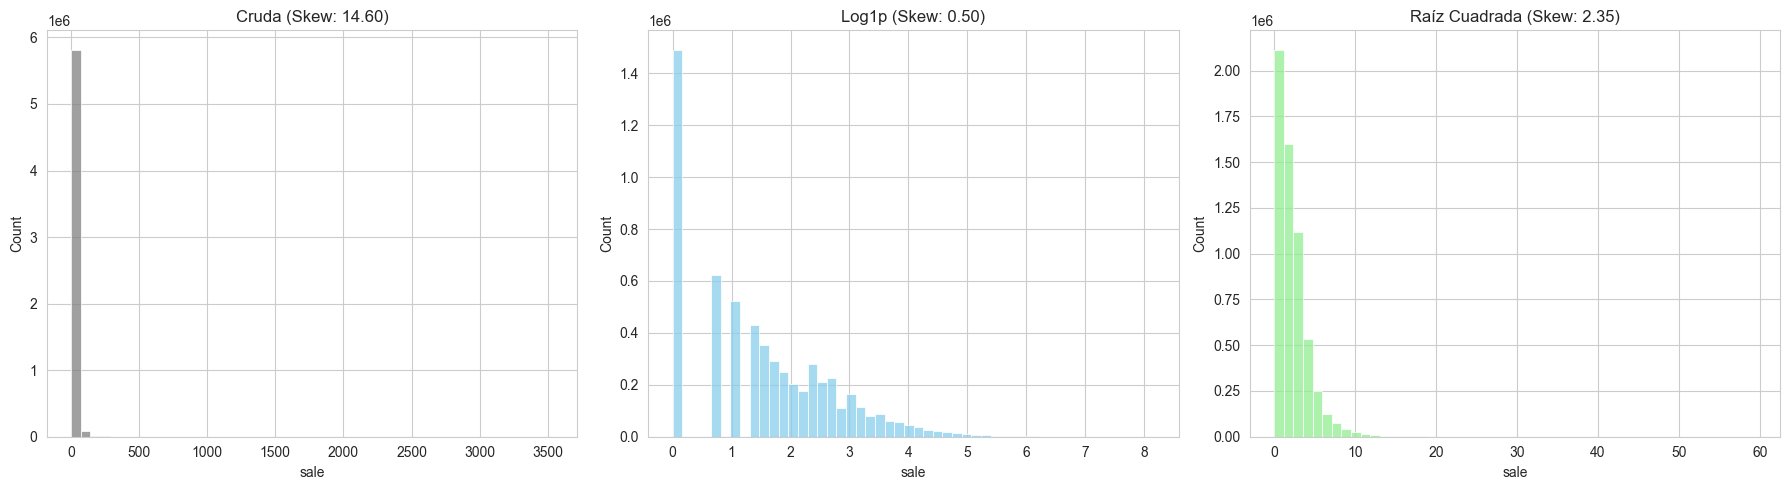

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 5))

# 1. Cruda
plt.subplot(1, 3, 1)
sns.histplot(df_weekly['sale'], bins=50, color='gray')
plt.title(f"Cruda (Skew: {df_weekly['sale'].skew():.2f})")

# 2. Log1p
plt.subplot(1, 3, 2)
log_y = np.log1p(df_weekly['sale'])
sns.histplot(log_y, bins=50, color='skyblue')
plt.title(f"Log1p (Skew: {log_y.skew():.2f})")

# 3. Raíz Cuadrada (Sqrt)
plt.subplot(1, 3, 3)
sqrt_y = np.sqrt(df_weekly['sale'])
sns.histplot(sqrt_y, bins=50, color='lightgreen')
plt.title(f"Raíz Cuadrada (Skew: {sqrt_y.skew():.2f})")

plt.tight_layout()
plt.show()

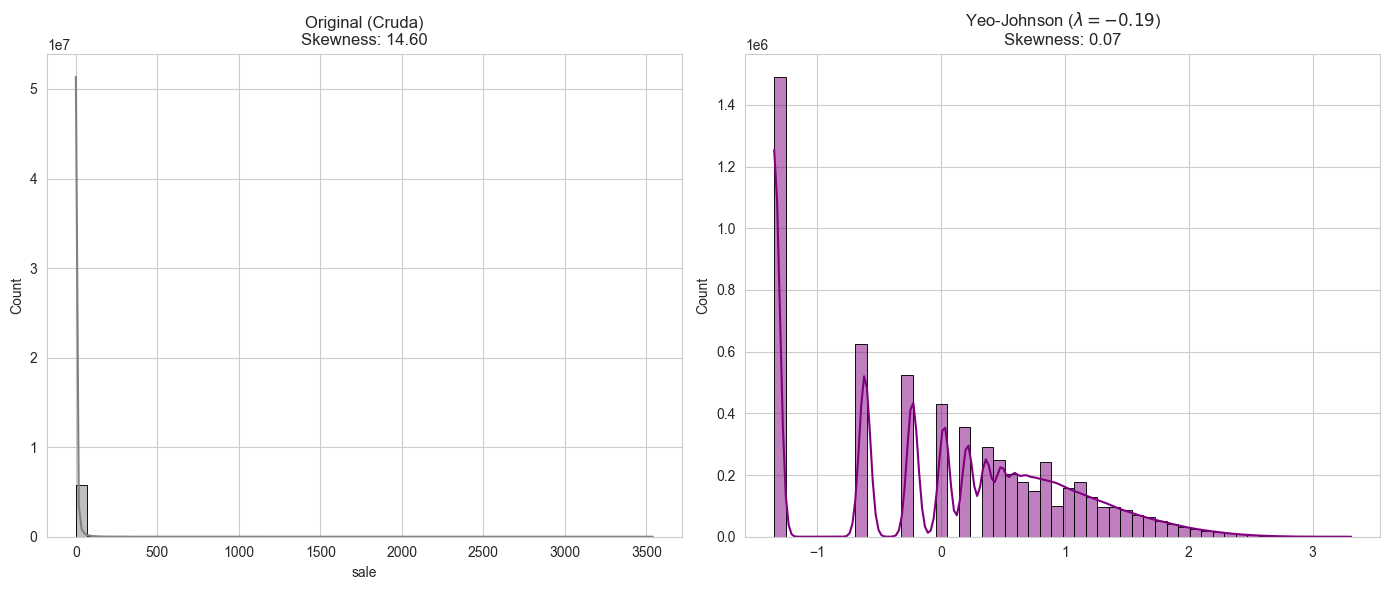

Lambda óptimo: -0.1910


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PowerTransformer

#Aplicamos Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=True)

sales_yeo = pt.fit_transform(df_weekly[['sale']])
sales_yeo_clean = sales_yeo.values.flatten() if hasattr(sales_yeo, 'values') else sales_yeo.flatten()

sales_yeo_series = pd.Series(sales_yeo_clean)
lambda_optimo = pt.lambdas_[0]

# Visualización
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df_weekly['sale'], bins=50, kde=True, color='gray', edgecolor='black')
plt.title(f"Original (Cruda)\nSkewness: {df_weekly['sale'].skew():.2f}", fontsize=12)

# Yeo-Johnson
plt.subplot(1, 2, 2)
sns.histplot(sales_yeo_series, bins=50, kde=True, color='purple', edgecolor='black')
plt.title(f"Yeo-Johnson ($\lambda={lambda_optimo:.2f}$)\nSkewness: {sales_yeo_series.skew():.2f}", fontsize=12)

plt.tight_layout()
plt.show()

print(f"Lambda óptimo: {lambda_optimo:.4f}")

In [39]:
model_lasso_sqrt = lasso_pipeline_evaluation(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.sqrt,
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 16.11
Error Relativo Final: 198.91%


In [40]:
model_lasso_log1p = lasso_pipeline_evaluation(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.log1p,
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 20.02
Error Relativo Final: 247.14%


In [41]:
model_lasso_yeo = lasso_pipeline_evaluation(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform='yeo-johnson',
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 20.16
Error Relativo Final: 248.88%


In [84]:
## Con optimización de alpha con LassoCV
model_lasso_sqrt = lasso_pipeline_evaluation(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.sqrt,
    use_optimization=True
)

--- Iniciando Búsqueda Rápida de Alpha con LassoCV (<ufunc 'sqrt'>) ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


   >>> Mejor Alpha encontrado: 0.290414
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 14.94
Error Relativo Final: 184.38%


In [85]:
pipeline_interno = model_lasso_sqrt.regressor_

# Acceder al modelo Lasso dentro del Pipeline
modelo_lasso_final = pipeline_interno.named_steps['model']

# Obtener el Alpha
best_alpha = modelo_lasso_final.alpha
best_alpha

0.2904136787833035

In [103]:
preprocessor_step = pipeline_interno.named_steps['preprocessor']
feature_names = preprocessor_step.get_feature_names_out()

# Obtener los coeficientes del modelo Lasso
coeficientes = modelo_lasso_final.coef_

# Crear un DataFrame
df_importancia = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coeficientes,
    'Abs_Coef': abs(coeficientes) # Para ordenar por impacto absoluto
})

df_importancia

,Feature,Coeficiente,Abs_Coef
0,cluster_0,0.000000,0.000000
1,cluster_1,0.000000,0.000000
2,cluster_2,-0.000000,0.000000
3,cluster_3,0.000000,0.000000
4,cluster_4,-0.000000,0.000000
5,cluster_5,-0.000000,0.000000
6,cluster_6,-0.000000,0.000000
7,store_code_PHI_2,-0.000000,0.000000
8,cos_year,-0.000000,0.000000
9,tavg,0.000000,0.000000


In [91]:
# Features más importantes
print(df_importancia[df_importancia.Abs_Coef>0].sort_values('Abs_Coef', ascending=False).head(10))

                       Feature  Coeficiente  Abs_Coef
42        rolling_mean_4w_sale     0.736975  0.736975
49                  lag_1_sale     0.670354  0.670354
11  department_HOME_&_GARDEN_2    -0.000675  0.000675


In [92]:
# Vars eliminadas
vars_eliminadas = df_importancia[df_importancia['Coeficiente'] == 0]
print(f"\nVariables eliminadas: {len(vars_eliminadas)} de {len(df_importancia)}")


Variables eliminadas: 52 de 55


#### Transformacion conjunta de target y variables de lag

In [118]:

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor, make_column_selector
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.metrics import root_mean_squared_error

def lasso_pipeline_evaluation_2(x_train_clean, y_train, x_val_clean, y_val, preprocessor, 
                              target_transform=np.log1p, 
                              use_optimization=True):
    """
    Entrena un Pipeline Lasso. Si use_optimization=True, utiliza LassoCV para encontrar 
    el mejor alpha automáticamente de forma ultrarrápida.
    """
    
    # 1. Configurar Lógica de Transformación (Diccionario de argumentos)
    tt_args = {}
    
    # Objeto auxiliar para transformar manualmente antes del CV
    manual_transformer = None 
    
    if target_transform == np.log1p:
        feat_trans_func = np.log1p
    elif target_transform == np.sqrt:
        feat_trans_func = np.sqrt
    elif target_transform == 'yeo-johnson':
        feat_trans_func = np.log1p 
    else:
        feat_trans_func = None
        
    cols_lags = [c for c in x_train_clean.columns if 'lag' in c or 'rolling' in c or 'shift' in c]
    cols_resto = [c for c in x_train_clean.columns if c not in cols_lags and c != 'cluster']
    
    lag_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('transform', FunctionTransformer(
            feat_trans_func, 
            validate=False, 
            feature_names_out='one-to-one'  # <--- ¡ESTA ES LA LÍNEA MÁGICA!
        )),
        ('scaler', StandardScaler())
    ])
    
    if target_transform is None:
        tt_args['func'] = lambda y: y
        tt_args['inverse_func'] = lambda y: y
        manual_transformer = lambda y: y
        
    elif target_transform == np.log1p:
        tt_args['func'] = np.log1p
        tt_args['inverse_func'] = np.expm1
        manual_transformer = np.log1p
        
    elif target_transform == np.sqrt:
        tt_args['func'] = np.sqrt
        tt_args['inverse_func'] = lambda y: y**2
        manual_transformer = np.sqrt
        
    elif target_transform == 'yeo-johnson':
        # Pipeline final: TransformedTargetRegressor maneja el objeto
        tt_args['transformer'] = PowerTransformer(method='yeo-johnson', standardize=True)
        
        # Manual: Ajustamos uno temporal para preparar los datos del CV
        pt_manual = PowerTransformer(method='yeo-johnson', standardize=True)
        # Ajustamos a y_train (necesita reshape 2D)
        pt_manual.fit(y_train.values.reshape(-1, 1))
        
        manual_transformer = lambda y: pt_manual.transform(y.values.reshape(-1, 1)).flatten()
        
    else:
        raise ValueError(f"Transformación '{target_transform}' no soportada.")

    # Valor por defecto si no optimizamos
    best_alpha = 1.0 
    
    # BLOQUE DE OPTIMIZACIÓN (LassoCV)
    
    # 4. Actualizar el Preprocessor
    preprocessor_avanzado = ColumnTransformer(
        transformers=[
            # A. Clusters (Categórica)
            ('cat_cluster', categorical_transformer, ['cluster']),
            
            # B. Objetos (Categórica)
            ('cat_objects', categorical_transformer, make_column_selector(dtype_include=['object'])),
            
            # C. Lags y Rolling (Numérica + Transformación Log/Sqrt) <--- NUEVO
            ('num_lags', lag_transformer, cols_lags),
            
            # D. Resto de Numéricas (Solo Scaler)
            ('num_resto', numeric_transformer, cols_resto)
        ],
        verbose_feature_names_out=False
    )
    
    if use_optimization:
        print(f"--- Iniciando Búsqueda Rápida de Alpha con LassoCV ({target_transform}) ---")

        x_train_enc = preprocessor_avanzado.fit_transform(x_train_clean)
        y_train_trans = manual_transformer(y_train)
        
        # Ejecutar LassoCV
        lasso_cv = LassoCV(
            n_alphas=100,      # Probará 100 valores distintos
            cv=3,              # 3 Folds es suficiente y rápido
            random_state=42,
            n_jobs=-1,         # Usar todos los procesadores
            max_iter=5000,     # Margen para convergencia
            verbose=False
        )
        
        lasso_cv.fit(x_train_enc, y_train_trans)
        
        best_alpha = lasso_cv.alpha_
        print(f"   >>> Mejor Alpha encontrado: {best_alpha:.6f}")
        
    else:
        print(f"--- Usando Alpha por defecto (1.0) ---")

    # CONSTRUCCIÓN DEL MODELO FINAL
    
    lasso_base = Lasso(
        alpha=best_alpha,
        random_state=42, 
        max_iter=10000 # Damos más margen al modelo final
    )

    # Pipeline Maestro
    final_pipeline = TransformedTargetRegressor(
        regressor=Pipeline(steps=[
            ('preprocessor', preprocessor_avanzado),
            ('model', lasso_base)
        ]),
        **tt_args
    )

    # Entrenamiento Final
    final_pipeline.fit(x_train_clean, y_train)
    preds_val = final_pipeline.predict(x_val_clean)
    
    rmse_val = root_mean_squared_error(y_val, preds_val)
    mean_sales = y_val.mean()
    rmse_pct = (rmse_val / mean_sales) * 100

    print(f"--- Resultados Finales Pipeline ---")
    print(f"RMSE Val (Unidades): {rmse_val:.2f}")
    print(f"Error Relativo Final: {rmse_pct:.2f}%")
    
    return final_pipeline

In [94]:
df_weekly_lasso = df_weekly.copy()


# Revertir el -1000 a NaN
df_weekly_lasso = df_weekly_lasso.replace(-1000, np.nan)

# Eliminar filas que tengan CUALQUIER NaN
df_weekly_lasso = df_weekly_lasso.dropna()


In [99]:
model_lasso_sqrt_2 = lasso_pipeline_evaluation_2(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.sqrt,
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 15.18
Error Relativo Final: 187.41%


In [100]:
model_lasso_log1p_2 = lasso_pipeline_evaluation_2(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.log1p,
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 19.94
Error Relativo Final: 246.11%


In [101]:
model_lasso_yeo_2 = lasso_pipeline_evaluation_2(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform='yeo-johnson',
    use_optimization=False
)

--- Usando Alpha por defecto (1.0) ---
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 20.16
Error Relativo Final: 248.88%


In [119]:
# El mejor resultado nos ha dado, de nuevo, con sqrt, pasamos a optimizacion de alpha con LassoCV
model_lasso_optimized = lasso_pipeline_evaluation_2(
    x_train_clean, y_train,
    x_val_clean, y_val,
    preprocessor,
    target_transform=np.sqrt,
    use_optimization=True
)

--- Iniciando Búsqueda Rápida de Alpha con LassoCV (<ufunc 'sqrt'>) ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


   >>> Mejor Alpha encontrado: 0.001960
--- Resultados Finales Pipeline ---
RMSE Val (Unidades): 8.70
Error Relativo Final: 107.36%


In [121]:

preprocessor = pipeline_interno.named_steps['preprocessor']

ohe_cluster = preprocessor.named_transformers_['cat_cluster']['onehot']
names_cluster = ohe_cluster.get_feature_names_out(['cluster'])

# Lags y rolling (Numérica - Pipeline + Transformación)
names_lags = [c for c in x_train_clean.columns if 'lag' in c or 'rolling' in c or 'shift' in c]

# Resto Numéricas
names_resto = [c for c in x_train_clean.columns if c not in names_lags and c != 'cluster']

# Concatenamos todo en orden EXACTO
all_feature_names = list(names_cluster) + list(names_lags) + list(names_resto)

print(f"Total features recuperadas: {len(all_feature_names)}")
print(f"Total coeficientes Lasso: {len(modelo_lasso_final.coef_)}")

df_importancia = pd.DataFrame({
    'Feature': all_feature_names,
    'Coeficiente': modelo_lasso_final.coef_,
    'Abs_Coef': abs(modelo_lasso_final.coef_)
})

print(df_importancia.sort_values('Abs_Coef', ascending=False).head(10))

Total features recuperadas: 55
Total coeficientes Lasso: 55
                 Feature  Coeficiente  Abs_Coef
11  rolling_mean_4w_sale     1.073107  1.073107
7             lag_1_sale     0.818887  0.818887
15                 Month    -0.162800  0.162800
22              sin_year    -0.109846  0.109846
10           lag_52_sale     0.097525  0.097525
9            lag_26_sale     0.092201  0.092201
32             xmas_heat     0.064679  0.064679
26                  tmax     0.041516  0.041516
16             Day_month    -0.041278  0.041278
37     is_holiday_closed     0.032398  0.032398


In [124]:

print(df_importancia[df_importancia.Abs_Coef>0].sort_values('Abs_Coef', ascending=False).tail(20))

                       Feature  Coeficiente  Abs_Coef
50  department_HOME_&_GARDEN_1     0.013305  0.013305
21             market_presence     0.013034  0.013034
33              superbowl_heat    -0.012374  0.012374
54    department_SUPERMARKET_3     0.012059  0.012059
29                        wspd     0.010919  0.010919
30             rain_days_count     0.010247  0.010247
31             valentines_heat     0.008547  0.008547
44            store_code_NYC_3     0.008478  0.008478
38      sale_region_proportion     0.007833  0.007833
19       changed_price_vs_mean    -0.006550  0.006550
45            store_code_NYC_4    -0.003149  0.003149
42            store_code_NYC_1     0.003032  0.003032
39     sale_quarter_proportion     0.002771  0.002771
48            store_code_PHI_3    -0.002406  0.002406
35                  july4_heat    -0.002321  0.002321
46            store_code_PHI_1     0.002282  0.002282
34           thanksgiving_heat    -0.001591  0.001591
0                    cluster

## Transformacion del target con log y diff

In [126]:
x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)
range(270, 279)
(274410, 49) (274410,)


In [134]:
import numpy as np
import pandas as pd

def transform_target_and_create_features(
    df, target_col='sale', group_col='unique_id',
    transform_type='log', use_diff=True, diff_periods=1,
    lag_periods=[1, 4, 26, 52],
    drop_na=True
):

    df_transformed = df.copy()
    
    # Diccionario para guardar info de las transformaciones
    transform_info = {
        'transform_type': transform_type,
        'use_diff': use_diff,
        'diff_periods': diff_periods,
        'lag_periods': lag_periods,
        'original_shape': df.shape,
        'columns_created': []
    }

    
    if transform_type == 'log':
        df_transformed[f'{target_col}_transformed'] = np.log1p(df_transformed[target_col])
        transform_info['transform_func'] = 'log1p'
        transform_info['inverse_func'] = 'expm1'
        print(f"\n✓ Aplicada transformación log1p")
        
    elif transform_type == 'sqrt':
        df_transformed[f'{target_col}_transformed'] = np.sqrt(df_transformed[target_col])
        transform_info['transform_func'] = 'sqrt'
        transform_info['inverse_func'] = 'square'
        print(f"\n✓ Aplicada transformación sqrt")
        
    else:  # 'none'
        df_transformed[f'{target_col}_transformed'] = df_transformed[target_col]
        transform_info['transform_func'] = 'none'
        transform_info['inverse_func'] = 'none'
        print(f"\n✓ Sin transformación aplicada")
    
    transform_info['columns_created'].append(f'{target_col}_transformed')
    

    # DIFERENCIACIÓN POR GRUPO
    
    if use_diff:
        df_transformed[f'{target_col}_diff'] = (
            df_transformed.groupby(group_col)[f'{target_col}_transformed']
            .diff(periods=diff_periods)
        )
        
        n_na_diff = df_transformed[f'{target_col}_diff'].isna().sum()
        
        transform_info['columns_created'].append(f'{target_col}_diff')
        transform_info['na_from_diff'] = n_na_diff
        
        # La columna a usar para lags será la diferenciada
        lag_source_col = f'{target_col}_diff'
    else:
        lag_source_col = f'{target_col}_transformed'
        
    # CREAR ROLLING MEAN DE 4 SEMANAS COMO FEATURE ADICIONAL
    rolling_col_name = f'{lag_source_col}_rolling_4'
    df_transformed[rolling_col_name] = (
        df_transformed.groupby(group_col)[lag_source_col]
        .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
    )
    transform_info['columns_created'].append(rolling_col_name)
    
    # CREAR LAGS SOBRE LA VARIABLE TRANSFORMADA (Y DIFERENCIADA)
    
    print(f"\n✓ Creando lags de '{lag_source_col}':")
    
    total_na_lags = 0
    
    for lag in lag_periods:
        lag_col_name = f'{lag_source_col}_lag_{lag}'
        
        df_transformed[lag_col_name] = (
            df_transformed.groupby(group_col)[lag_source_col]
            .shift(lag)
        )
        
        n_na_this_lag = df_transformed[lag_col_name].isna().sum()
        total_na_lags += n_na_this_lag
        
        print(f"  - Lag {lag}: {lag_col_name} (NaN: {n_na_this_lag})")
        transform_info['columns_created'].append(lag_col_name)
    
    transform_info['na_from_lags'] = total_na_lags
    
    # ELIMINAR NaN (OPCIONAL)
  
    if drop_na:
        # Eliminar filas con NaN en las columnas creadas
        cols_to_check = [col for col in transform_info['columns_created']]
        df_transformed = df_transformed.dropna(subset=cols_to_check)
    
    

    print(f"Columnas creadas: {len(transform_info['columns_created'])}")
    print(f"\nNuevas columnas:")
    for col in transform_info['columns_created']:
        print(f"  - {col}")
    
    return df_transformed, transform_info




In [137]:
df_weekly_transformed_sqrt, transform_info = transform_target_and_create_features(
    df=df_weekly,
    target_col='sale',
    group_col='unique_id',
    transform_type='sqrt',
    use_diff=True,
    diff_periods=1,
    lag_periods=[1, 4, 26, 52],
    drop_na=True
)


✓ Aplicada transformación sqrt

✓ Creando lags de 'sale_diff':
  - Lag 1: sale_diff_lag_1 (NaN: 60980)
  - Lag 4: sale_diff_lag_4 (NaN: 152450)
  - Lag 26: sale_diff_lag_26 (NaN: 822905)
  - Lag 52: sale_diff_lag_52 (NaN: 1611733)
Columnas creadas: 7

Nuevas columnas:
  - sale_transformed
  - sale_diff
  - sale_diff_rolling_4
  - sale_diff_lag_1
  - sale_diff_lag_4
  - sale_diff_lag_26
  - sale_diff_lag_52


In [139]:
df_weekly_transformed_log, transform_info = transform_target_and_create_features(
    df=df_weekly,
    target_col='sale',
    group_col='unique_id',
    transform_type='log',
    use_diff=True,
    diff_periods=1,
    lag_periods=[1, 4, 26, 52],  # Ajusta según tus necesidades
    drop_na=True
)


✓ Aplicada transformación log1p

✓ Creando lags de 'sale_diff':
  - Lag 1: sale_diff_lag_1 (NaN: 60980)
  - Lag 4: sale_diff_lag_4 (NaN: 152450)
  - Lag 26: sale_diff_lag_26 (NaN: 822905)
  - Lag 52: sale_diff_lag_52 (NaN: 1611733)
Columnas creadas: 7

Nuevas columnas:
  - sale_transformed
  - sale_diff
  - sale_diff_rolling_4
  - sale_diff_lag_1
  - sale_diff_lag_4
  - sale_diff_lag_26
  - sale_diff_lag_52


In [151]:
df_weekly_ln_diff = df_weekly.copy()

In [152]:
df_weekly_ln_diff['sale'] = np.log(df_weekly_ln_diff['sale']+1)

In [153]:
df_unique_id_diff_first_value = df_weekly_ln_diff.groupby('unique_id')['sale'].first().reset_index().rename(columns={'sale':'first_sale_value'})

In [154]:
df_weekly_ln_diff['sale'] = df_weekly_ln_diff.groupby(['unique_id'])['sale'].diff(1)

In [155]:
df_weekly_ln_diff.dropna(subset=['sale'], inplace=True)

In [156]:
max_week = df_weekly.week_number.max()
min_week = df_weekly.week_number.min()

week_number_val = 255
week_number_test = 270
max_week_test = 279


x_train, y_train_ln_diff = get_data_splits(df_weekly_ln_diff, train_dates)
x_val, y_val_ln_diff = get_data_splits(df_weekly_ln_diff, val_dates)
x_test, y_test_ln_diff = get_data_splits(df_weekly_ln_diff, test_dates)

range(53, 254)
(5104313, 49) (5104313,)
range(255, 269)
(426581, 49) (426581,)
range(270, 279)
(274410, 49) (274410,)


In [182]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import random

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# =============================================================================
# 1. PREPARACIÓN DE DATOS Y FEATURE ENGINEERING
# =============================================================================
# Hacemos copia para no tocar el original
df_weekly_ln_diff = df_weekly.copy()

# A. Transformación Logarítmica (Log1p para gestionar ceros)
# Guardamos la variable en escala logarítmica (NIVEL) para poder reconstruir después
df_weekly_ln_diff['sale_log_level'] = np.log1p(df_weekly_ln_diff['sale'])

# B. Transformación Diferencial (Target)
# Calculamos la diferencia sobre el logaritmo
df_weekly_ln_diff['target_diff'] = df_weekly_ln_diff.groupby('unique_id')['sale_log_level'].diff(1)

# C. Generación de Features (Lags y Rolling sobre el TARGET DIFF)
# IMPORTANTE: Se calculan sobre 'target_diff', no sobre 'sale' original.

# Lags solicitados
lags = [1, 4, 26, 52]
for lag in lags:
    df_weekly_ln_diff[f'lag_{lag}'] = df_weekly_ln_diff.groupby('unique_id')['target_diff'].shift(lag)

# Rolling Mean con Shift (Evitar Leakage)
# Explicación: shift(1) mueve los datos 1 semana al futuro, así que la media de las últimas 4 semanas
# en la fila T se calcula usando T-1, T-2, T-3, T-4.
df_weekly_ln_diff['rolling_mean_4'] = (
    df_weekly_ln_diff.groupby('unique_id')['target_diff']
    .shift(1)
    .rolling(window=4)
    .mean()
)

# D. Limpieza
# Eliminamos filas con NaNs generados por lags (el lag 52 genera muchos nulos al principio)
df_weekly_ln_diff.dropna(subset=['target_diff', 'rolling_mean_4', 'lag_52'], inplace=True)

# =============================================================================
# 2. DEFINICIÓN DE SPLITS
# =============================================================================
# Asumimos que tienes una columna 'date' o usas 'week_number' para filtrar
week_number_val = 255
week_number_test = 270

# Definimos las máscaras de tiempo
train_mask = df_weekly_ln_diff['week_number'] < week_number_val
val_mask = (df_weekly_ln_diff['week_number'] >= week_number_val) & (df_weekly_ln_diff['week_number'] < week_number_test)

# Separamos X e Y
features_cols = [c for c in df_weekly_ln_diff.columns if c not in ['unique_id', 'week_number', 'sale', 'sale_log_level', 'target_diff']]

# Train
x_train = df_weekly_ln_diff.loc[train_mask, features_cols]
y_train_diff = df_weekly_ln_diff.loc[train_mask, 'target_diff']
y_train_prev_level = df_weekly_ln_diff.loc[train_mask].groupby('unique_id')['sale_log_level'].shift(1) # Para reconstruir
y_train_real = df_weekly_ln_diff.loc[train_mask, 'sale'] # Para calcular RMSE final

# Val
x_val = df_weekly_ln_diff.loc[val_mask, features_cols]
y_val_diff = df_weekly_ln_diff.loc[val_mask, 'target_diff']
y_val_prev_level = df_weekly_ln_diff.loc[val_mask].groupby('unique_id')['sale_log_level'].shift(1) # Para reconstruir
y_val_real = df_weekly_ln_diff.loc[val_mask, 'sale'] # Para calcular RMSE final

# Eliminamos filas donde el 'prev_level' sea NaN (inicio de series) para poder comparar
# Esto es necesario para la reconstrucción one-step-ahead
valid_train_idx = y_train_prev_level.notna()
x_train = x_train[valid_train_idx]
y_train_diff = y_train_diff[valid_train_idx]
y_train_prev_level = y_train_prev_level[valid_train_idx]
y_train_real = y_train_real[valid_train_idx]

valid_val_idx = y_val_prev_level.notna()
x_val = x_val[valid_val_idx]
y_val_diff = y_val_diff[valid_val_idx]
y_val_prev_level = y_val_prev_level[valid_val_idx]
y_val_real = y_val_real[valid_val_idx]



In [174]:
df_weekly_ln_diff.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [ ]:

# FUNCIÓN DE RECONSTRUCCIÓN (ONE-STEP AHEAD)
def inverse_transform_one_step(y_pred_diff, y_prev_log_level):
    """
    Reconstruye la predicción: 
    Log_Actual_Pred = Log_Anterior_Real + Diff_Predicha
    Venta_Final = expm1(Log_Actual_Pred)
    """
    # 1. Sumamos la diferencia predicha al nivel logarítmico real anterior
    y_pred_log_level = y_prev_log_level + y_pred_diff
    
    # 2. Deshacemos el logaritmo
    y_pred_original = np.expm1(y_pred_log_level)
    
    return y_pred_original



In [170]:
df_weekly_ln_diff.head()

,sale,sell_price,week_number,Year,Quarter,Month,Day_month,price_mean_year,price_proportion_item_department,changed_price_vs_mean,...,department_SUPERMARKET_1,department_SUPERMARKET_2,department_SUPERMARKET_3,sale_log_level,target_diff,lag_1,lag_4,lag_26,lag_52,rolling_mean_4
53,6,10.99,184,2014,3,7,12,11.168508,1.315132,-0.015983,...,0,0,0,1.945910,0.847298,-0.510826,0.000000,0.000000,-0.223144,0.101366
54,4,10.99,185,2014,3,7,19,11.168508,1.315132,-0.015983,...,0,0,0,1.609438,-0.336472,0.847298,1.252763,1.609438,0.000000,0.313191
55,7,10.99,186,2014,3,7,26,11.168508,1.315132,-0.015983,...,0,0,0,2.079442,0.470004,-0.336472,-0.336472,-1.609438,-0.693147,-0.084118
56,1,10.99,187,2014,3,8,2,11.168508,1.315132,-0.015983,...,0,0,0,0.693147,-1.386294,0.470004,-0.510826,0.693147,-0.693147,0.117501
57,0,10.99,188,2014,3,8,9,11.168508,1.315132,-0.015983,...,0,0,0,0.000000,-0.693147,-1.386294,0.847298,-0.693147,0.000000,-0.101366


In [183]:
# BUCLE DE SELECCIÓN DE FEATURES

results = {}
all_features = x_train.columns.tolist()

for i in range(1, 200):
    # Selección aleatoria de features
    n_feats = random.randint(10, 25)
    features_selected = random.sample(all_features, n_feats)
    
    x_train_i = x_train[features_selected]
    x_val_i = x_val[features_selected]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=8,
        random_state=42
    )

    # Entrenar sobre el TARGET DIFF
    model.fit(x_train_i, y_train_diff)

    # Predecir y Reconstruir (TRAIN)
    # Predicción del diff
    y_train_pred_diff = model.predict(x_train_i)
    # Reconstrucción a escala real
    y_train_pred_real = inverse_transform_one_step(y_train_pred_diff, y_train_prev_level)
    # RMSE
    rmse_train = root_mean_squared_error(y_train_real, y_train_pred_real)

    # Predecir y Reconstruir (VAL)
    y_val_pred_diff = model.predict(x_val_i)
    y_val_pred_real = inverse_transform_one_step(y_val_pred_diff, y_val_prev_level)
    rmse_val = root_mean_squared_error(y_val_real, y_val_pred_real)

    # 6. Guardar y Mostrar
    print(f"Iter {i:02d} | Feats: {len(features_selected):02d} | RMSE Train: {rmse_train:.2f} | RMSE Val: {rmse_val:.2f}")
    
    # Guardamos features y métricas
    results[i] = {
        'features': features_selected,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val
    }

# Para ver el mejor resultado al final
best_iter = min(results, key=lambda x: results[x]['rmse_val'])
print(f"\nMejor Iteración: {best_iter}")
print(f"Mejor RMSE Val: {results[best_iter]['rmse_val']:.4f}")
print(f"Features: {results[best_iter]['features']}")

Iter 01 | Feats: 23 | RMSE Train: 10.48 | RMSE Val: 9.09
Iter 02 | Feats: 18 | RMSE Train: 10.32 | RMSE Val: 12.14
Iter 03 | Feats: 11 | RMSE Train: 10.76 | RMSE Val: 12.74
Iter 04 | Feats: 16 | RMSE Train: 9.86 | RMSE Val: 9.70
Iter 05 | Feats: 22 | RMSE Train: 9.75 | RMSE Val: 9.10
Iter 06 | Feats: 16 | RMSE Train: 9.52 | RMSE Val: 8.66
Iter 07 | Feats: 17 | RMSE Train: 10.80 | RMSE Val: 10.67
Iter 08 | Feats: 22 | RMSE Train: 9.85 | RMSE Val: 9.45
Iter 09 | Feats: 21 | RMSE Train: 10.11 | RMSE Val: 9.52
Iter 10 | Feats: 12 | RMSE Train: 10.31 | RMSE Val: 10.24
Iter 11 | Feats: 25 | RMSE Train: 9.78 | RMSE Val: 9.91
Iter 12 | Feats: 19 | RMSE Train: 9.71 | RMSE Val: 9.73
Iter 13 | Feats: 23 | RMSE Train: 9.72 | RMSE Val: 9.40
Iter 14 | Feats: 21 | RMSE Train: 10.08 | RMSE Val: 9.35
Iter 15 | Feats: 25 | RMSE Train: 9.64 | RMSE Val: 9.33
Iter 16 | Feats: 21 | RMSE Train: 9.95 | RMSE Val: 9.77
Iter 17 | Feats: 15 | RMSE Train: 10.63 | RMSE Val: 12.53
Iter 18 | Feats: 14 | RMSE Train: 1

Rango de RMSE en el Top 20: 8.4423 - 8.9252


/var/folders/0k/71063_cn2ps_md8w_rmmdjqc0000gn/T/ipykernel_3842/496108068.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_counts['count'].head(30), y=df_counts.index[:30], palette='viridis')


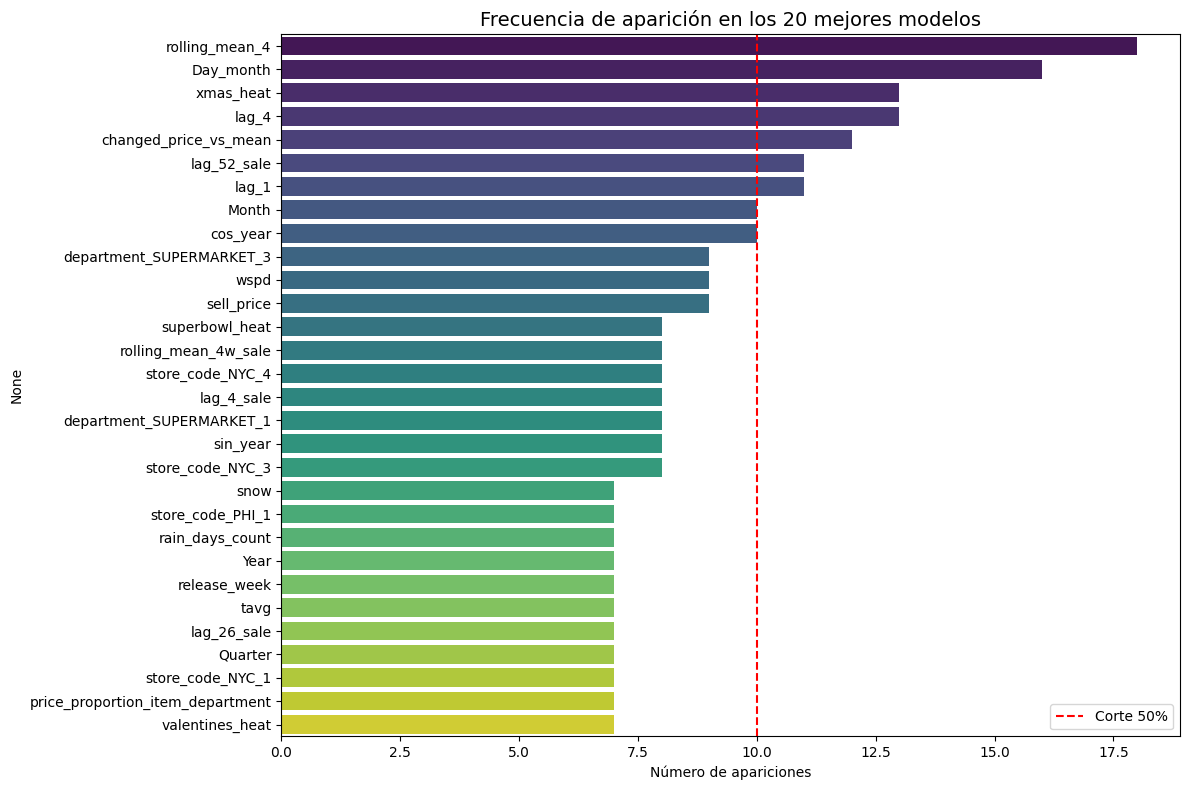

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Convertir el diccionario de resultados a DataFrame para manipularlo fácil
df_results = pd.DataFrame.from_dict(results, orient='index')

# 2. Seleccionar el "Top Tier" de modelos
top_n = 20  
top_models = df_results.sort_values('rmse_val', ascending=True).head(top_n)

print(f"Rango de RMSE en el Top {top_n}: {top_models['rmse_val'].min():.4f} - {top_models['rmse_val'].max():.4f}")

# 3. Contar frecuencia de aparición de cada feature
all_top_features = [feat for feature_list in top_models['features'] for feat in feature_list]

feature_counts = Counter(all_top_features)
df_counts = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
df_counts = df_counts.sort_values('count', ascending=False)

# Calculamos el porcentaje de aparición (Frecuencia relativa)
df_counts['frequency_pct'] = (df_counts['count'] / top_n) * 100

# 4. Visualización de la Importancia (Frecuencia)
plt.figure(figsize=(12, 8))
sns.barplot(x=df_counts['count'].head(30), y=df_counts.index[:30], palette='viridis')
plt.title(f'Frecuencia de aparición en los {top_n} mejores modelos', fontsize=14)
plt.xlabel('Número de apariciones')
plt.axvline(x=top_n * 0.5, color='red', linestyle='--', label='Corte 50%') # Línea de corte sugerida
plt.legend()
plt.tight_layout()
plt.show()



In [185]:
# Selección Final (Criterio de Consenso)

umbral_corte = 0.5 # 50%
features_robustas = df_counts[df_counts['frequency_pct'] >= (umbral_corte * 100)].index.tolist()

print(f"\n--- SELECCIÓN ROBUSTA ---")
print(f"Total features encontradas en el top: {len(df_counts)}")
print(f"Features seleccionadas (aparecen en >{umbral_corte*100}% de modelos): {len(features_robustas)}")
print(f"Lista Definitiva: {features_robustas}")


--- SELECCIÓN ROBUSTA ---
Total features encontradas en el top: 54
Features seleccionadas (aparecen en >50.0% de modelos): 9
Lista Definitiva: ['rolling_mean_4', 'Day_month', 'xmas_heat', 'lag_4', 'changed_price_vs_mean', 'lag_52_sale', 'lag_1', 'Month', 'cos_year']


In [186]:
import optuna
import xgboost as xgb

# Filtrar los datasets para usar SOLO esas features
x_train_opt = x_train[features_robustas]
x_val_opt = x_val[features_robustas]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [191]:
# Probamos modelo con solo las features seleccionadas
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=8,
    random_state=42
)

model.fit(
x_train_opt, 
y_train_diff,
eval_set=[(x_train_opt, y_train_diff), (x_val_opt, y_val_diff)],
verbose=False
)
    
# Predecir diferencia logarítmica
preds_diff_log = model.predict(x_val_opt)
    
# Reconstruir a escala real (One-Step Ahead)
preds_real = inverse_transform_one_step(preds_diff_log, y_val_prev_level)
    
# Calcular RMSE Real
rmse = root_mean_squared_error(y_val_real, preds_real)
rmse
    

8.568940339348627

In [195]:
select_features = ['sale_quarter_proportion',
 'store_code_BOS_3',
 'snow',
 'store_code_BOS_2',
 'market_presence',
 'sin_year',
 'july4_heat',
 'price_mean_year',
 'department_SUPERMARKET_2',
 'Day_month',
 'lag_52_sale',
 'department_HOME_&_GARDEN_1',
 'department_SUPERMARKET_1',
 'tavg',
 'rolling_mean_4w_sale',
 'lag_1_sale',
 'xmas_heat',
 'valentines_heat',
 'Year']

x_train_final = x_train[select_features]
x_val_final = x_val[select_features]
x_test_final = x_test[select_features]

model_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=10,
    random_state=42,
    early_stopping_rounds=10
)

model_final.fit(
    x_train_final, 
    y_train_diff,
    eval_set=[(x_train_final, y_train_diff), (x_val_final, y_val_diff)],
    verbose=False
)

# Predecir diferencia logarítmica
preds_diff_log_final = model_final.predict(x_val_final)
# Reconstruir a escala real (One-Step Ahead)
preds_real_final = inverse_transform_one_step(preds_diff_log_final, y_val_prev_level)
# Calcular RMSE Real
rmse_final = root_mean_squared_error(y_val_real, preds_real_final)
rmse_final

8.984900151441408

In [216]:
# =============================================================================
# CORRECCIÓN DE FEATURES MISMATCH
# =============================================================================

# 1. Obtener la lista exacta de features que el modelo tiene memorizada
# Esta propiedad contiene los nombres de columna usados en el .fit()
required_features = model_final.feature_names_in_

print(f"El modelo espera {len(required_features)} columnas.")
# print(required_features) # Descomenta si quieres ver la lista

# 2. Regenerar df_test_clean asegurando que tenemos todas las columnas necesarias
# (Necesitamos volver al df_weekly_ln_diff original para recuperar columnas si x_test no las tenía)

# Definimos las columnas totales para extraer: Las del modelo + Metadatos
cols_necesarias_test = list(required_features) + ['prev_log_level', 'sale', 'unique_id']

# Filtramos del dataframe maestro original (df_weekly_ln_diff)
df_test_raw = df_weekly_ln_diff.loc[test_mask, cols_necesarias_test].copy()

# 3. Limpieza y Alineación
df_test_clean = df_test_raw.dropna()
df_test_clean = df_test_clean.set_index('unique_id')

# 4. Crear los sets finales ALINEADOS y ORDENADOS
# Es vital usar [required_features] aquí para forzar el mismo orden que en el train
x_test_aligned = df_test_clean[required_features]
y_test_prev_aligned = df_test_clean['prev_log_level']
y_test_real_aligned = df_test_clean['sale']

print(f"--- Alineación Corregida ---")
print(f"x_test shape: {x_test_aligned.shape}")
print(f"Columnas coinciden: {list(x_test_aligned.columns) == list(required_features)}")

# =============================================================================
# PREDICCIÓN
# =============================================================================

# Ahora el predict no fallará
y_test_pred_diff = model_final.predict(x_test_aligned)

# Reconstrucción
y_test_pred_real = inverse_transform_one_step(y_test_pred_diff, y_test_prev_aligned)

# RMSE
rmse_test = root_mean_squared_error(y_test_real_aligned, y_test_pred_real)
print(f"\nRMSE Test Final: {rmse_test:.4f}")

El modelo espera 19 columnas.
--- Alineación Corregida ---
x_test shape: (269541, 19)
Columnas coinciden: True

RMSE Test Final: 8.6232


Las transformaciones con dif y log no han dado mejores resultados que simplemente el cambio del target por el logaritmo.

In [226]:
final_model = model_final

# =============================================================================
# 1. GENERACIÓN DE PREDICCIONES (Preservando índices para graficar)
# =============================================================================

# Definimos columnas necesarias (Asegurándonos de incluir week_number para graficar luego si hace falta)
# required_features viene de final_model.feature_names_in_
cols_necesarias = list(required_features) + ['prev_log_level', 'sale', 'unique_id', 'week_number']

# --- A. PREPARAR TEST (Sin set_index destructivo) ---
# Copiamos del original usando la máscara
df_test_viz_ready = df_weekly_ln_diff.loc[test_mask, cols_necesarias].copy()
df_test_viz_ready = df_test_viz_ready.dropna() # Limpiamos nulos

# Al no hacer set_index('unique_id'), conservamos el índice numérico original (0, 1, 2...)
# Esto es la CLAVE para poder asignar luego a df_viz.

# Separamos X e Y (usando el índice numérico para alinear)
x_test_viz = df_test_viz_ready[required_features]
y_test_prev_viz = df_test_viz_ready['prev_log_level']

# Predecimos
y_test_pred_diff_viz = final_model.predict(x_test_viz)

# Reconstruimos (Alineación por índice numérico funciona perfecto)
y_test_pred_real_viz = inverse_transform_one_step(y_test_pred_diff_viz, y_test_prev_viz)


# --- B. PREPARAR VALIDACIÓN (Mismo proceso) ---
df_val_viz_ready = df_weekly_ln_diff.loc[val_mask, cols_necesarias].copy()
df_val_viz_ready = df_val_viz_ready.dropna()

x_val_viz = df_val_viz_ready[required_features]
y_val_prev_viz = df_val_viz_ready['prev_log_level']

y_val_pred_diff_viz = final_model.predict(x_val_viz)
y_val_pred_real_viz = inverse_transform_one_step(y_val_pred_diff_viz, y_val_prev_viz)

print("Predicciones regeneradas manteniendo índices originales.")

Predicciones regeneradas manteniendo índices originales.


In [228]:
# =============================================================================
# 2. CREACIÓN DEL DATAFRAME DE VISUALIZACIÓN
# =============================================================================

# Creamos el df base copiando del original
cols_to_keep = ['unique_id', 'week_number', 'sale', 'cluster'] # Añade 'cluster' u otra categórica
df_viz = df_weekly_ln_diff[cols_to_keep].copy()

# Inicializamos columnas de predicción vacías
df_viz['Prediction_Val'] = np.nan
df_viz['Prediction_Test'] = np.nan

# --- ASIGNACIÓN SEGURA ---
# Como no tocamos el índice en el paso 1, los índices coinciden.
# Pandas usa el índice para saber dónde poner cada valor.
df_viz.loc[y_val_pred_real_viz.index, 'Prediction_Val'] = y_val_pred_real_viz
df_viz.loc[y_test_pred_real_viz.index, 'Prediction_Test'] = y_test_pred_real_viz

# Verificación
print("Muestra de datos de Test en df_viz:")
print(df_viz.dropna(subset=['Prediction_Test']).head())

Muestra de datos de Test en df_viz:
                  unique_id  week_number  sale  cluster  Prediction_Val  \
139  ACCESORIES_1_001_BOS_1          270     4        5             NaN   
140  ACCESORIES_1_001_BOS_1          271     2        5             NaN   
141  ACCESORIES_1_001_BOS_1          272     3        5             NaN   
142  ACCESORIES_1_001_BOS_1          273     2        5             NaN   
143  ACCESORIES_1_001_BOS_1          274     3        5             NaN   

     Prediction_Test  
139         0.871191  
140         1.215852  
141         1.143347  
142         1.874208  
143         1.997998  


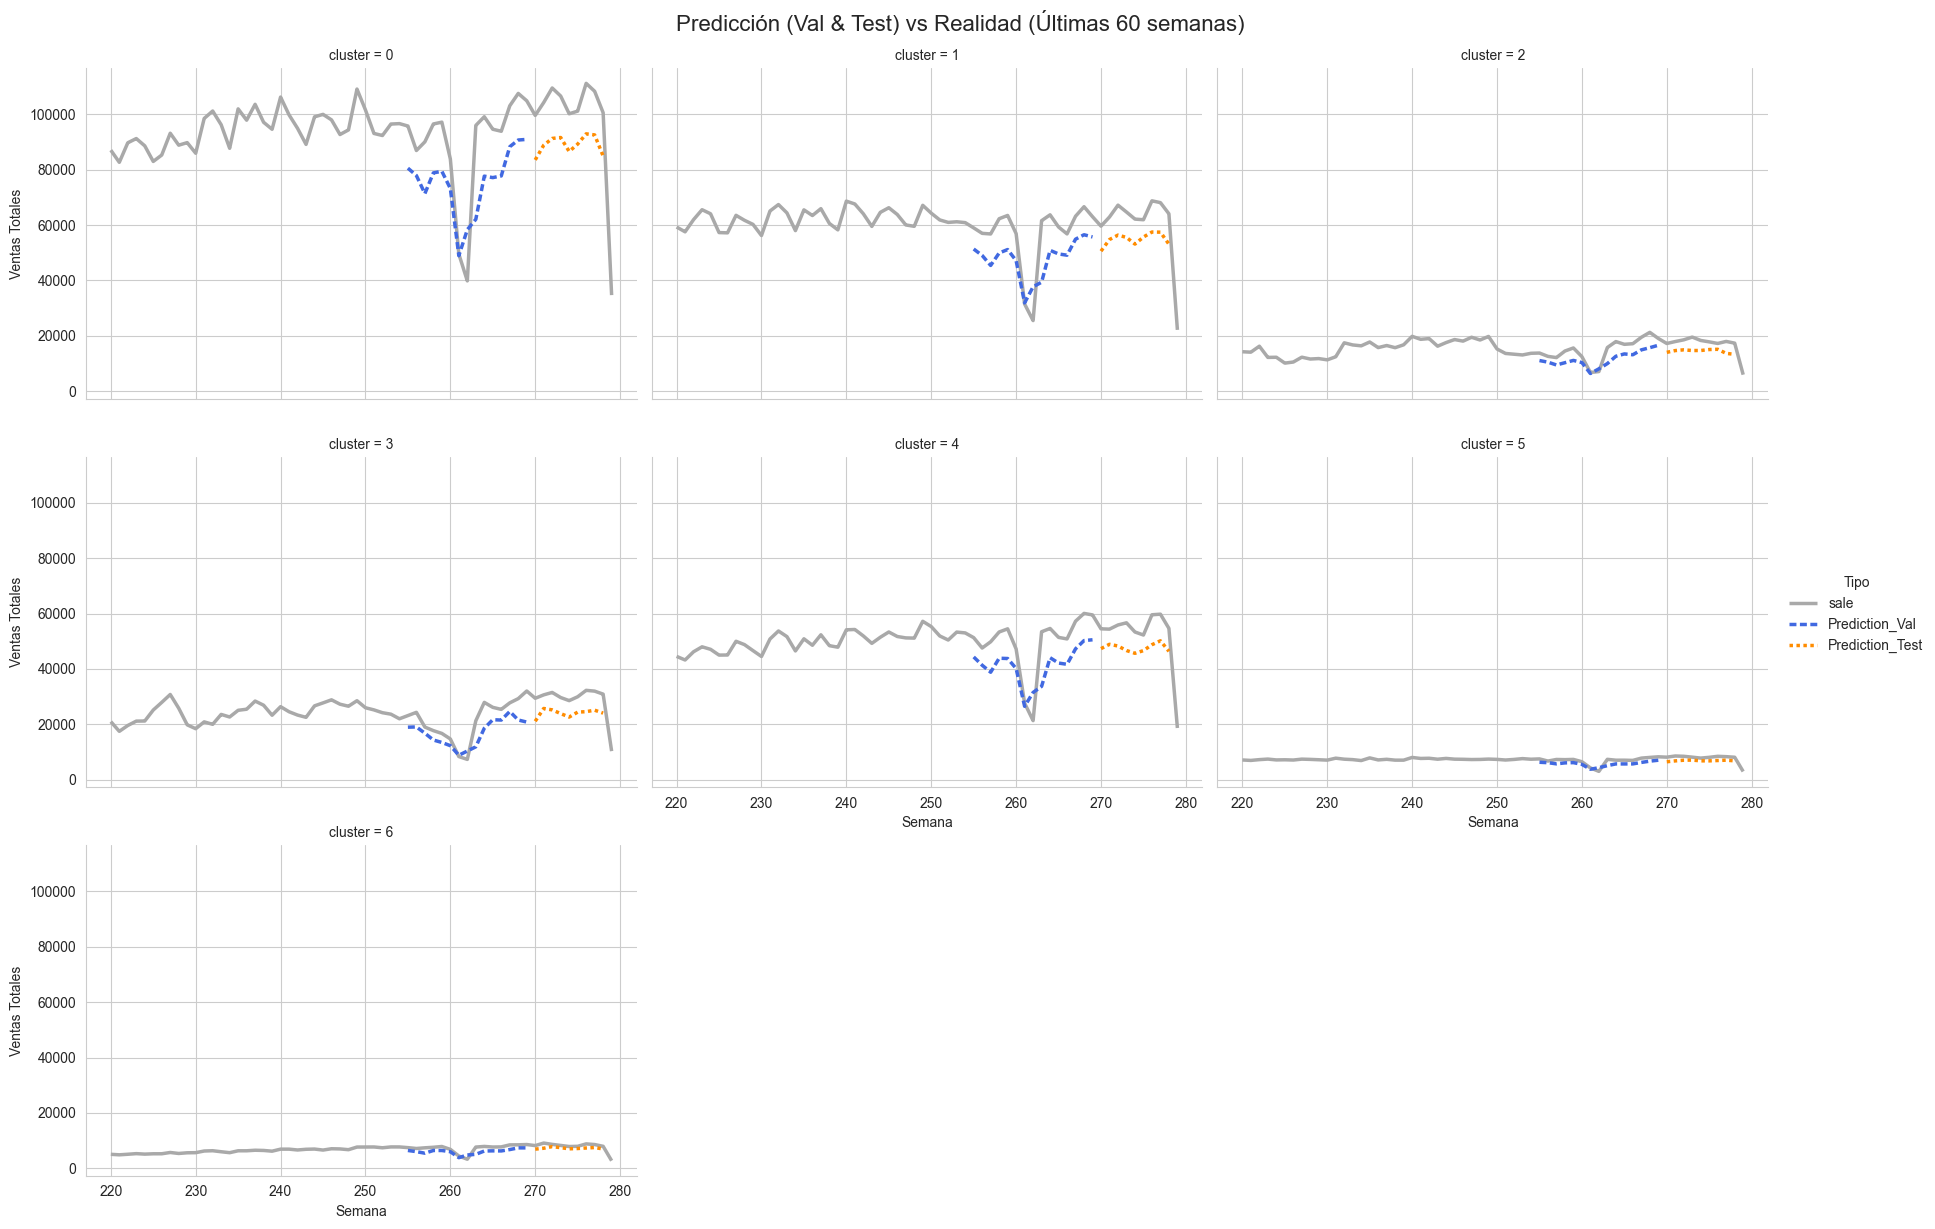

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_full_forecast_by_category(df, 
                                   col_category, 
                                   col_actual='sale', 
                                   pred_cols=['Prediction_Val', 'Prediction_Test'],
                                   col_time='week_number', 
                                   last_n_weeks=52):
    """
    Visualiza Realidad vs Validación vs Test agrupado por categoría.
    Maneja automáticamente los huecos (NaNs) para no pintar líneas donde no hay predicción.
    """
    
    # 1. Filtrar tiempo (Últimas N semanas)
    max_time = df[col_time].max()
    min_time = max_time - last_n_weeks
    df_filtered = df[df[col_time] > min_time].copy()
    
    # 2. Agrupación (Sumar ventas por categoría y semana)
    # Sumamos tanto lo real como las columnas de predicción
    # min_count=1 asegura que si todo es NaN, la suma sea NaN (para no pintar 0)
    cols_to_sum = [col_actual] + pred_cols
    df_grouped = df_filtered.groupby([col_time, col_category])[cols_to_sum].sum(min_count=1).reset_index()
    
    # 3. Melt (Formato Largo para Seaborn)
    df_melted = df_grouped.melt(
        id_vars=[col_time, col_category],
        value_vars=cols_to_sum,
        var_name='Tipo',
        value_name='Ventas'
    )
    
    # 4. Configuración de Colores (Diccionario Manual)
    # Así aseguramos que Real siempre sea Gris, Val Azul, Test Naranja
    custom_palette = {
        col_actual: 'darkgrey',       # Realidad: Gris oscuro
        pred_cols[0]: 'royalblue',    # Validación: Azul Real
        pred_cols[1]: 'darkorange'    # Test: Naranja fuerte
    }
    
    # Estilos de línea (Real sólida, Predicciones punteadas o distintas)
    custom_styles = {
        col_actual: (1, 0),       # Sólida
        pred_cols[0]: (2, 1),     # Guiones
        pred_cols[1]: (1, 1)      # Puntos
    }

    # 5. Gráfico
    sns.set_style("whitegrid")
    
    g = sns.relplot(
        data=df_melted,
        x=col_time, 
        y='Ventas',
        col=col_category,
        hue='Tipo',
        style='Tipo',
        dashes=custom_styles, # Aplicamos estilos de línea personalizados
        kind='line',
        palette=custom_palette, # Aplicamos colores personalizados
        col_wrap=3, 
        height=4, 
        aspect=1.5,
        linewidth=2.5
    )
    
    # Detalles finales
    g.fig.suptitle(f'Predicción (Val & Test) vs Realidad (Últimas {last_n_weeks} semanas)', y=1.02, fontsize=16)
    g.set_axis_labels("Semana", "Ventas Totales")
    
    plt.show()

# -------------------------------------------------------
# EJECUCIÓN
# -------------------------------------------------------

plot_full_forecast_by_category(
    df=df_viz, 
    col_category='cluster', # O la variable categórica que quieras visualizar
    col_actual='sale',
    pred_cols=['Prediction_Val', 'Prediction_Test'],
    last_n_weeks=60 # Ponemos un poco más de un año para ver el contexto
)

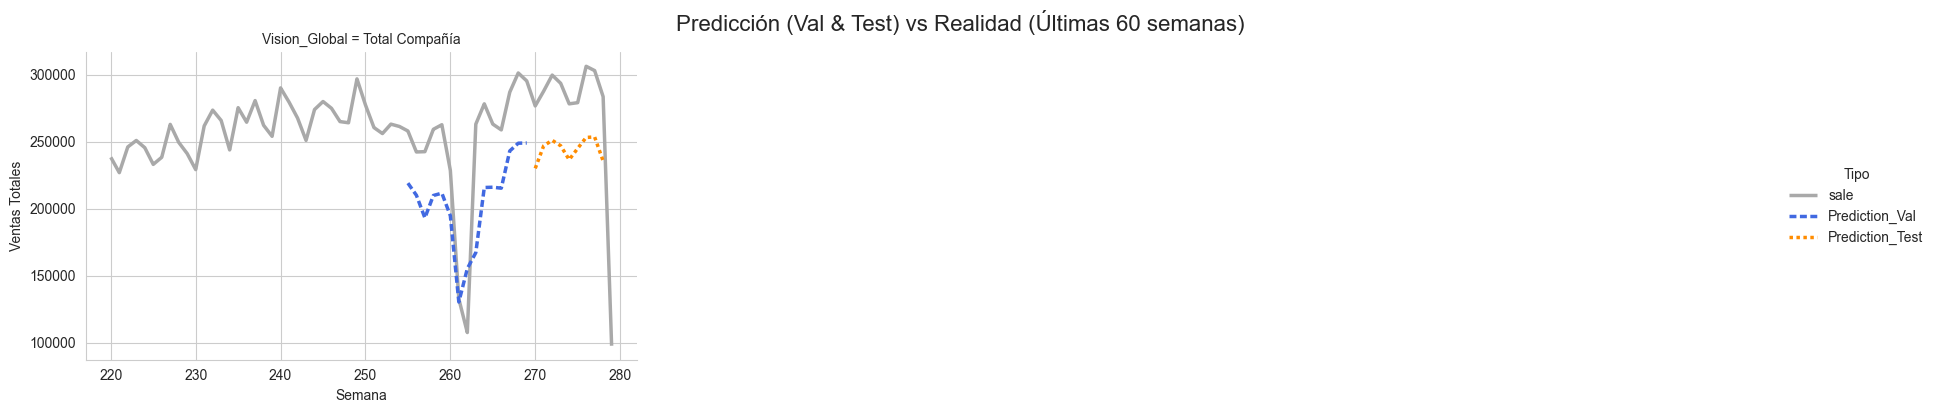

In [237]:
df_viz['Vision_Global'] = 'Total Compañía'

# 2. Llamar a la función usando esa columna
plot_full_forecast_by_category(
    df=df_viz, 
    col_category='Vision_Global',
    col_actual='sale',
    pred_cols=['Prediction_Val', 'Prediction_Test'],
    col_time='week_number',
    last_n_weeks=60
)

In [230]:
df_weekly.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [231]:
# Lista de prefijos que queremos recuperar
prefixes = ['store_code_', 'department_']

# Identificar todas las columnas OHE en el dataframe original (df_weekly_ln_diff)
cols_ohe = [c for c in df_weekly_ln_diff.columns if any(c.startswith(p) for p in prefixes)]

# Pegarlas a df_viz usando el índice (seguro y rápido)
df_viz = df_viz.join(df_weekly_ln_diff[cols_ohe])

In [232]:
def reverse_ohe(df, prefix):
    """
    Toma un DataFrame y un prefijo (ej: 'store_code_').
    Busca todas las columnas que empiecen por ese prefijo.
    Devuelve una Serie con la categoría original limpia.
    """
    # 1. Buscar columnas del grupo
    cols = [c for c in df.columns if c.startswith(prefix)]
    
    if not cols:
        print(f"Advertencia: No se encontraron columnas con prefijo '{prefix}'")
        return None

    # 2. Encontrar cuál columna tiene el 1 (idxmax)
    # Esto devuelve ej: "store_code_BOS_1"
    raw_category = df[cols].idxmax(axis=1)
    
    # 3. Limpiar el nombre (quitar el prefijo)
    # "store_code_BOS_1" -> "BOS_1"
    clean_category = raw_category.str.replace(prefix, '')
    
    return clean_category

# --- APLICACIÓN ---

# Regenerar Store Code
df_viz['store_code_recuperado'] = reverse_ohe(df_viz, 'store_code_')

# Regenerar Department
df_viz['department_recuperado'] = reverse_ohe(df_viz, 'department_')

# Verificación
print(df_viz[['store_code_recuperado', 'department_recuperado']].head())

   store_code_recuperado department_recuperado
53                 BOS_2          ACCESORIES_2
54                 BOS_2          ACCESORIES_2
55                 BOS_2          ACCESORIES_2
56                 BOS_2          ACCESORIES_2
57                 BOS_2          ACCESORIES_2


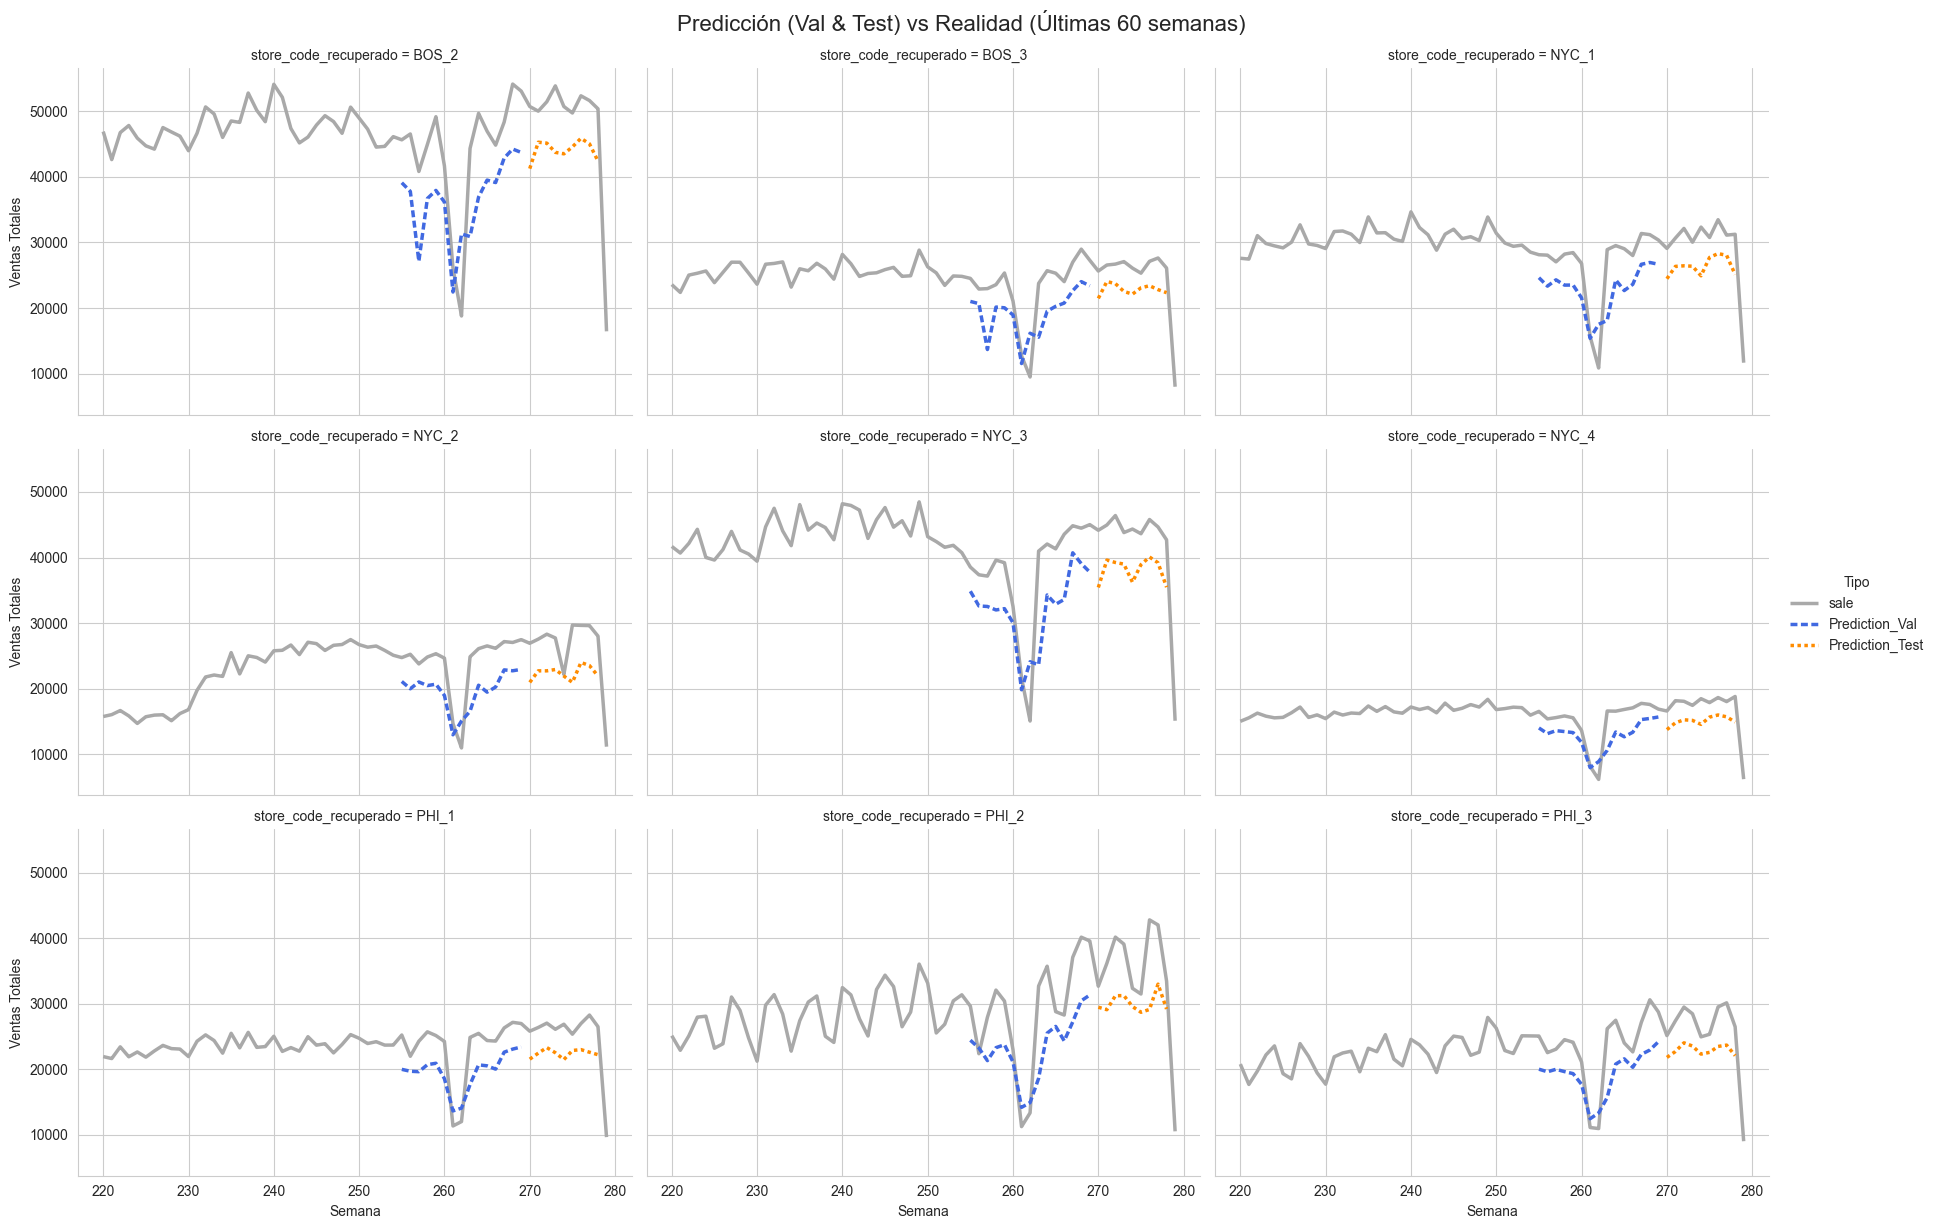

In [233]:
plot_full_forecast_by_category(
    df=df_viz, 
    col_category='store_code_recuperado',
    col_actual='sale',
    pred_cols=['Prediction_Val', 'Prediction_Test'],
    col_time='week_number',
    last_n_weeks=60
)

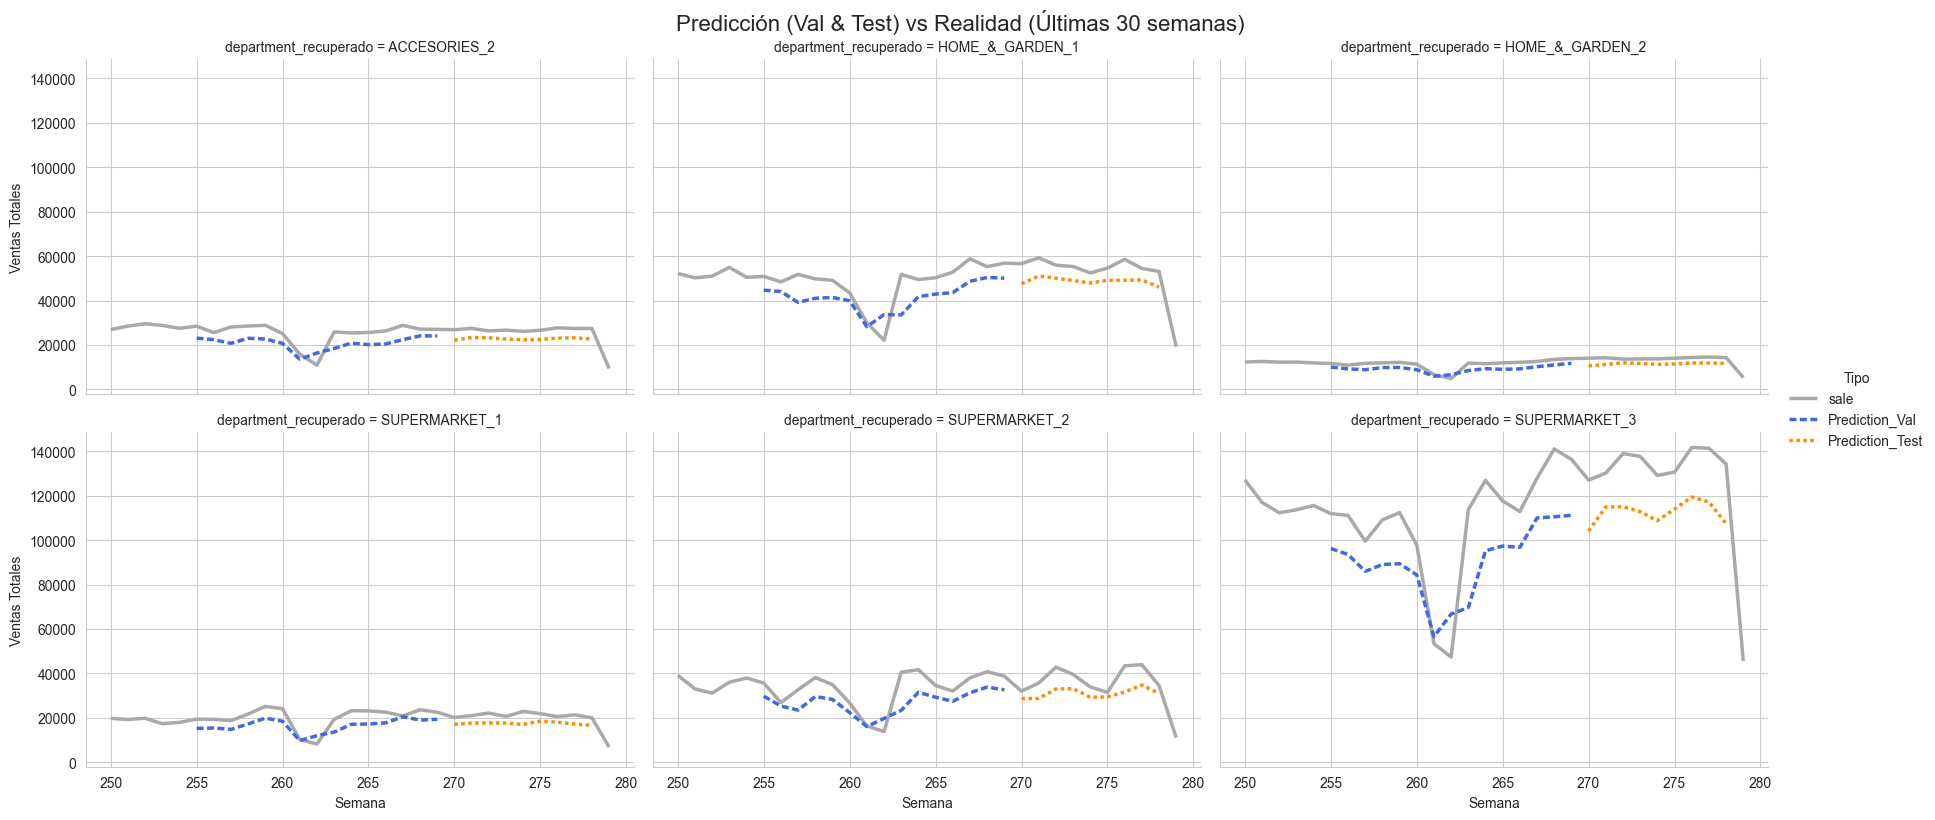

In [235]:
plot_full_forecast_by_category(
    df=df_viz, 
    col_category='department_recuperado',
    col_actual='sale',
    pred_cols=['Prediction_Val', 'Prediction_Test'],
    col_time='week_number',
    last_n_weeks=30
)

### Prediccion de datos posteriores

## Results